# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 
## Homework 2: kNN and Linear Regression

**Harvard University**<br/>
**Fall 2020**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner

<hr style="height:2.4pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
#RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

<hr style="height:2pt">

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.

- This homework can be submitted in pairs, and it is encouraged for you to do so. Especially during covid and distancing, this can be a way to work with other students and learn alongside one another. As future data scientists, you will often be expected to work with others, and working in pairs can help practice communicating data science concepts.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. Exceptions should be made for code with a long execution time, of course.
- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them. .
- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 
- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```

<hr style="height:2pt">

<div class="theme"> Overview </div> 

This assignment is the first where you will go through the process of loading a dataset, splitting it in train and test sets, 
pre-processing it, and finally using it to run models and evaluating your results. 

We have two different datasets, one with car data in **Part 1** and another with data from an Indian matrimonial web site in **Part 2**.

For part 1, you will explore two simple methods for prediction,  **k-nearest neighbors regression (kNN)**, a *non-parametric* method, and **linear regression**, a *parametric* method. As you move towards Part 2 of the homework, you will work with multiple linear and polynomial regression.

<div style="color: red; background: black">Please note that Question 4 and Question 7 are required for 209a students but are <strong>optional for 109a students</strong>. We include them here for your education, and we believe that if you have time to spend with them you will learn from them. But <strong>if you are in 109a, then Q4 and Q7 are completely optional</strong>. To help manage stress if you are not in 209a, we recommend skipping past these first and then coming back to them once you have finished the rest of the homework if you have time.</div>

In [3]:
#!pip install seaborn

In [4]:
#Importing standard libraries
import numpy as np
import operator
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

# Part 2 imports 
from scipy.stats import norm
from sklearn.preprocessing import PolynomialFeatures

In [5]:
# Run this cell for more readable visuals 
large = 22; med = 16; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.style.use('seaborn-whitegrid')
plt.rcParams.update(params)
#sns.set_style("white")
%matplotlib inline

<div class="theme"> Part A: k-NN and Linear Regression</div> 

### Problem Description: Predicting the Selling Price of Cars on CarDekho.com

According to its website, **CarDekho.com** is India's leading car search venture. 
Its website and app carry rich automotive content such as expert reviews, 
detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. 
Each car has a **Current selling price**, which is the price for buying the car on this site, and a **MRP**, 
which is the retail price of the car. These two prices differ depending on factors such as brand, 
make year, millage, condition, etc.  

#### Data set 

The dataset contains 601 cars and is in file `car_dekho_full.csv`. It contains the following columns:

- **Year** - make year (year the car was made), 
- **Current_Selling_Price** - current price of a car on CarDekho.com (in lakhs),
- **MRP** - maximum retail price of a car (in lakhs). 
- **Kms_Driven** - number of kilometers

Note: 1 *lakh*  is 100,000 Rupees in the Indian numbering system. Also, kilometers are used as a measure of distance instead of miles.

#### Your Task: 
Predict the `Current_Selling_Price` from the other features.

<div class='exercise'><b> Question 1:   Exploratory Data Analysis (EDA) [10 pts]</b>

To reach the goal of predicting the `Current_Selling_Price`, start by inspecting the dataset using Exploratory Data Analysis (EDA).

Load the dataset, inspect it and answer the following questions: 

**1.1** Which variables are quantitative, and which are categorical? 

**1.2** What are the means and standard deviations for `Current_Selling_Price` and `MRP`? 

**1.3** What is the range of Kilometers that the cars have?

**1.4** The goal of this part is to identify the best variable from which to predict our respone variable `Current Selling Price`. Plot a scatter plot between each predictor and reponse variable and examine the relationship between the predictors and `Current_Selling_Price`. Based on the plots, which is the  predictor that visually seems to best predict the `Current_Selling_Price`? 
    
    
Note: In general, it is always good to label your axes, title your graphs, and produce visuals which clearly communicate the data. Visuals should often be accompanied by text identifying the key point of the visual and defending any choices you make as a data scientist regarding the visual to best communicate your data. 
</div>

## Solutions 

In [6]:
df = pd.read_csv('data/car_dekho_full.csv')
df.head(5)

,Year,Current_Selling_Price,MRP,Kms_Driven
0,2016,5.25,5.70,3493
1,2005,3.51,13.70,75000
2,2010,0.31,1.05,213000
3,2006,2.10,7.60,50456
4,2005,0.20,0.57,55000


In [7]:
print(df.dtypes)

Year                       int64
Current_Selling_Price    float64
MRP                      float64
Kms_Driven                 int64
dtype: object


<div class='exercise-r'>  
 
**1.1** Which variables are quantitative, and which are categorical?
 
 </div>

'Year' variable is categorical and all th other vaiables are quantitative. We can see that by inspecting the cardinal of unique values of the 'Year' column. 

In [8]:
print(len(df['Year'].value_counts()))

15


Therefore, we only have $\textbf{15}$ different values for year. All the other variables are quantitative. 

<div class='exercise-r'>  
 
**1.2** What are the means and standard deviations for `Current_Selling_Price` and `MRP`?
 
 </div>

In [9]:
df.describe()

,Year,Current_Selling_Price,MRP,Kms_Driven
count,601.000,601.000,601.000,601.000
mean,2013.887,4.393,6.912,33718.745
std,2.721,4.518,6.480,26846.657
min,2003.000,0.120,0.320,500.000
25%,2012.000,1.050,1.470,15000.000
50%,2015.000,3.600,6.050,30000.000
75%,2016.000,5.800,9.400,46500.000
max,2018.000,33.000,36.230,213000.000


In [10]:
# name your variables mean_csp, mean_mrp, std_csp, std_mrp
# your code here
mean_csp, std_csp = df.describe()['Current_Selling_Price'].iloc[1], df.describe()['Current_Selling_Price'].iloc[2]
mean_mrp, std_mrp = df.describe()['MRP'].iloc[1], df.describe()['MRP'].iloc[2]


We can see that a specificity of $\textit{Current Selling Price}$ and $\textit{MRP}$ in terms of means and standard deviation is that the standard deviation is quite higher than the mean (and the median).  

<div class='exercise-r'>  
 
**1.3** What is the range of Kilometers that the cars have?
 
 </div>

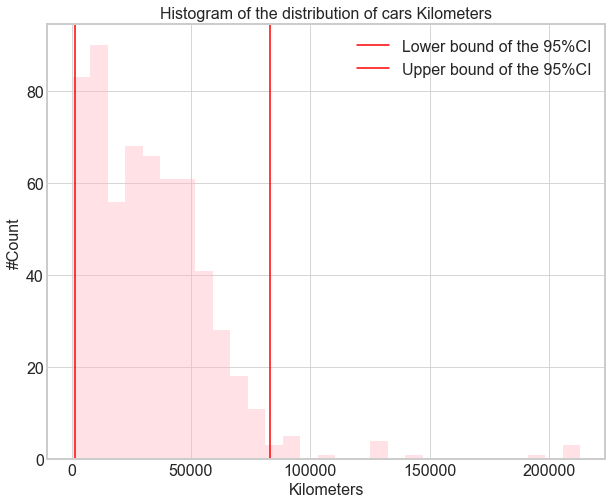

In [11]:
# your code here
plt.figure(figsize = (10, 8))
sns.distplot(df['Kms_Driven'], color = 'lightpink', kde=False)
plt.title('Histogram of the distribution of cars Kilometers')
plt.axvline(x = np.percentile(df['Kms_Driven'], 2.5), label= 'Lower bound of the 95%CI', color='red')
plt.axvline(x = np.percentile(df['Kms_Driven'], 97.5), label = 'Upper bound of the 95%CI', color='red')
plt.xlabel('Kilometers')
plt.ylabel('#Count')
plt.legend()


In [12]:
lower_CI, upper_CI = np.percentile(df['Kms_Driven'], 2.5), np.percentile(df['Kms_Driven'], 97.5)
print('The range of kilometers that the cars have are [' +str(df['Kms_Driven'].min())+'; '+str(df['Kms_Driven'].max())+']')
print('The range of kilometers that the cars usually have are [' +str(int(lower_CI))+'; '+str(int(upper_CI))+']')

The range of kilometers that the cars have are [500; 213000]
The range of kilometers that the cars usually have are [1400; 83000]


<div class='exercise-r'>  
 
**1.4** The goal of this part is to identify the best variable from which to predict our respone variable `Current Selling Price`. Plot a scatter plot between each predictor and reponse variable and examine the relationship between the predictors and `Current_Selling_Price`. Based on the plots, which is the  predictor that visually seems to best predict the `Current_Selling_Price`?
 
 
 Note: In general, it is always good to label your axes, title your graphs, and produce visuals which clearly communicate the data. Visuals should often be accompanied by text identifying the key point of the visual and defending any choices you make as a data scientist regarding the visual to best communicate your data.
 </div>

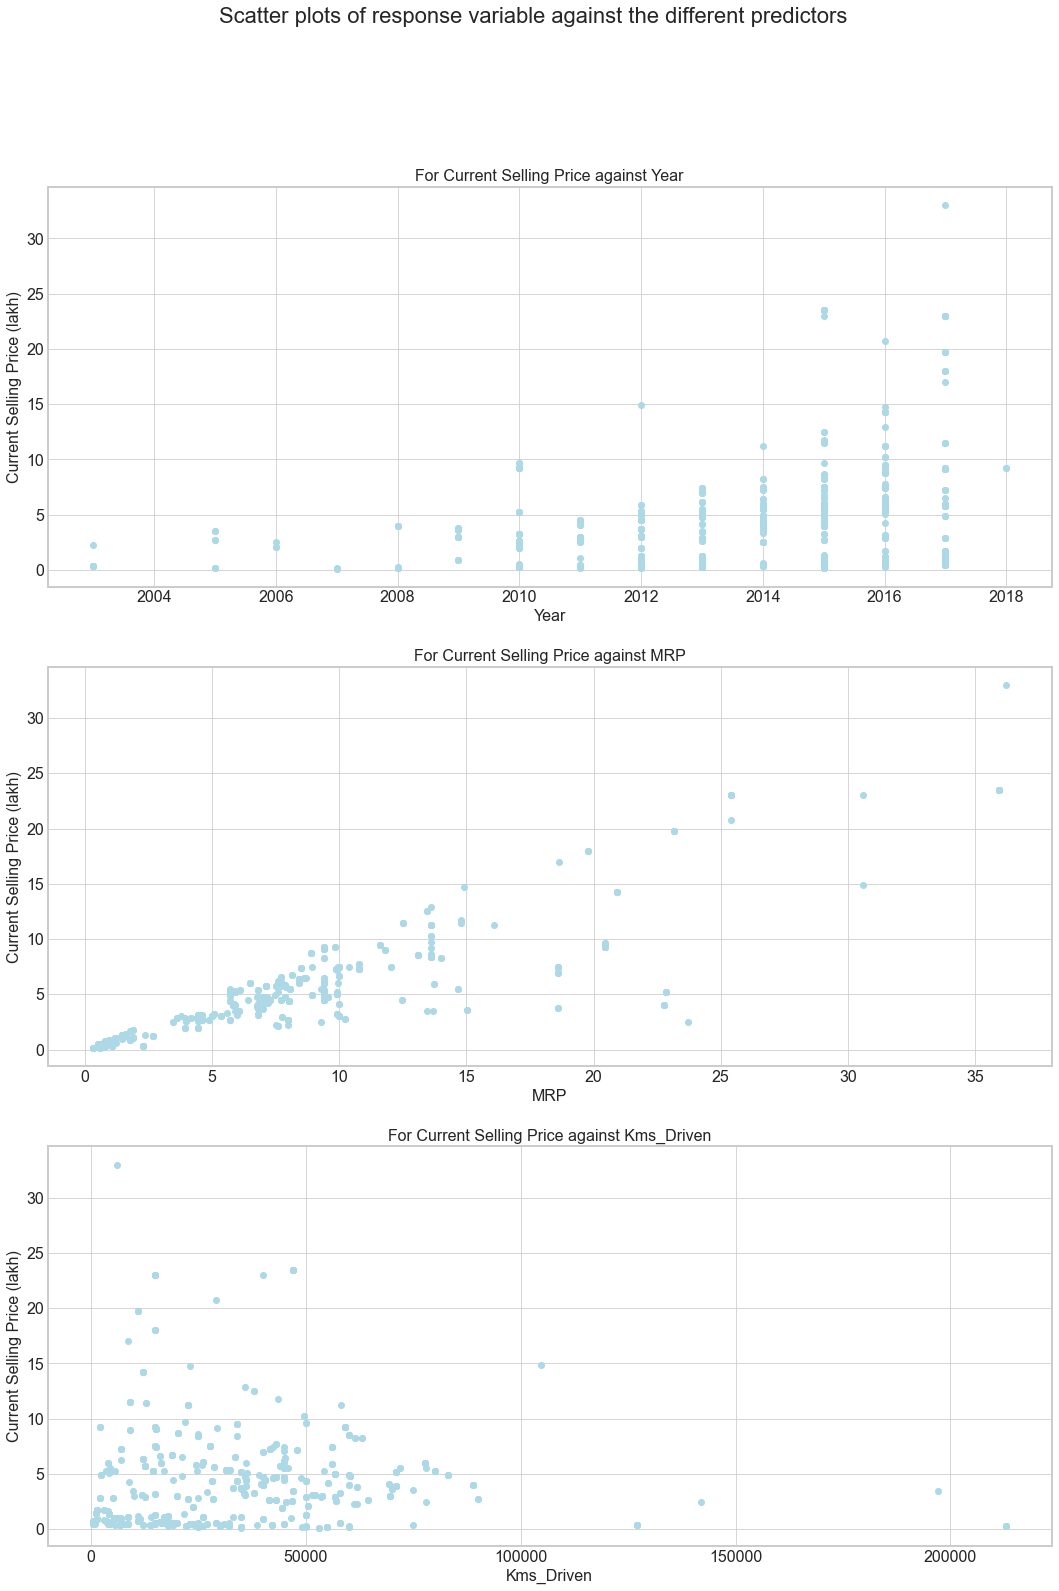

In [13]:
# your code here
predictors = df.drop('Current_Selling_Price', axis=1).columns.values
y = df['Current_Selling_Price']
fig, ax = plt.subplots(3, figsize = (18, 25))
plt.suptitle('Scatter plots of response variable against the different predictors')
for i, predictor in enumerate(predictors):
    ax[i].scatter(df[predictor], y, color='lightblue')
    ax[i].set_title('For Current Selling Price against '+predictor)
    ax[i].set_xlabel(predictor)
    ax[i].set_ylabel('Current Selling Price (lakh)')

According to the previous scatter plots, if we were asked to select $\textbf{one single predictor}$ that would allow to explain the distribution of Current Selling Price, we would choose $\textbf{MRP}$. Indeed, the predictor Kms_Driven does not allow to clearly identify a pattern for Current Selling Price, and the predictor Year could be useful. However, the scatter plot of Current Selling Price against MRP shows a clear trend and this is why I would go for this predictor.  

<div class='exercise'><b> Question 2:   k-Nearest Neighbors [25 pts]</b>

We begin our modeling with k-Nearest Neighbors (kNN) regression. You may use `sklearn`'s built-in functions.

**2.1** In this part, we will model a kNN regression on the predictor chosen above (1.4) and the response variable `Current_Selling_Price`.

    
INSTRUCTIONS:
- Split the dataset in train and test set with 75% training data and 25% testing data, using the random_state = 109.  
- Fit a kNN regression model to the training set for the following 8 different values of $k$:  $k = 1,2,3,5,7,10,50,100$. 
- Make 8 scatter plots of response vs. predictor for each $k$, arranged in a $4\times2$ grid.  Each figure should have plots of the prediction from the k-NN regression and the actual data points on the same figure, as well as axis labels, title, and legend. Consider using the subplot functionality, unless you first try this and then decide that you have a clearer, cleaner way of communicating these plots. 
- Evaluate the $MSE$ for the fitted models on both the training and test sets **for each $k$**.
- Plot the training and test $MSE$ values as a function of $k$ on the same figure.  Again, the figure must have axis labels and a legend.
- Find the best model based on the test $MSE$ values.
- Evaluate and report the $R^2$ of the best model.

**2.2** Discuss your results by answering the following questions.  You should answer the questions directly in a markdown cell of your notebook.

- How does the value of $k$ affect the fitted model?

- If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  

- Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.

- Run the same code by changing the random seed during the train-test split. Do you always get the same answer? If not, why?
    
    </div>

### Solutions

<div class='exercise-r'>  
 
**2.1** In this part, we will model a kNN regression on the predictor chosen above (1.4) and the response variable `Current_Selling_Price`.
 
 
 INSTRUCTIONS:
 - Split the dataset in train and test set with 75% training data and 25% testing data, using the random_state = 109.
 - Fit a kNN regression model to the training set for the following 8 different values of $k$:  $k = 1,2,3,5,7,10,50,100$.
 - Make 8 scatter plots of response vs. predictor for each $k$, arranged in a $4\times2$ grid.  Each figure should have plots of the prediction from the k-NN regression and the actual data points on the same figure, as well as axis labels, title, and legend. Consider using the subplot functionality, unless you first try this and then decide that you have a clearer, cleaner way of communicating these plots.
 - Evaluate the $MSE$ for the fitted models on both the training and test sets **for each $k$**.
 - Plot the training and test $MSE$ values as a function of $k$ on the same figure.  Again, the figure must have axis labels and a legend.
 - Find the best model based on the test $MSE$ values.
 - Evaluate and report the $R^2$ of the best model.
 
 </div>

In [14]:
#Choosing your predictor and response variable
x = df['MRP']
y = df['Current_Selling_Price']


In [15]:
##Splitting the data into train and test sets with 75% training data and 25% testing data. Set random_state=109
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.75, random_state = 109)


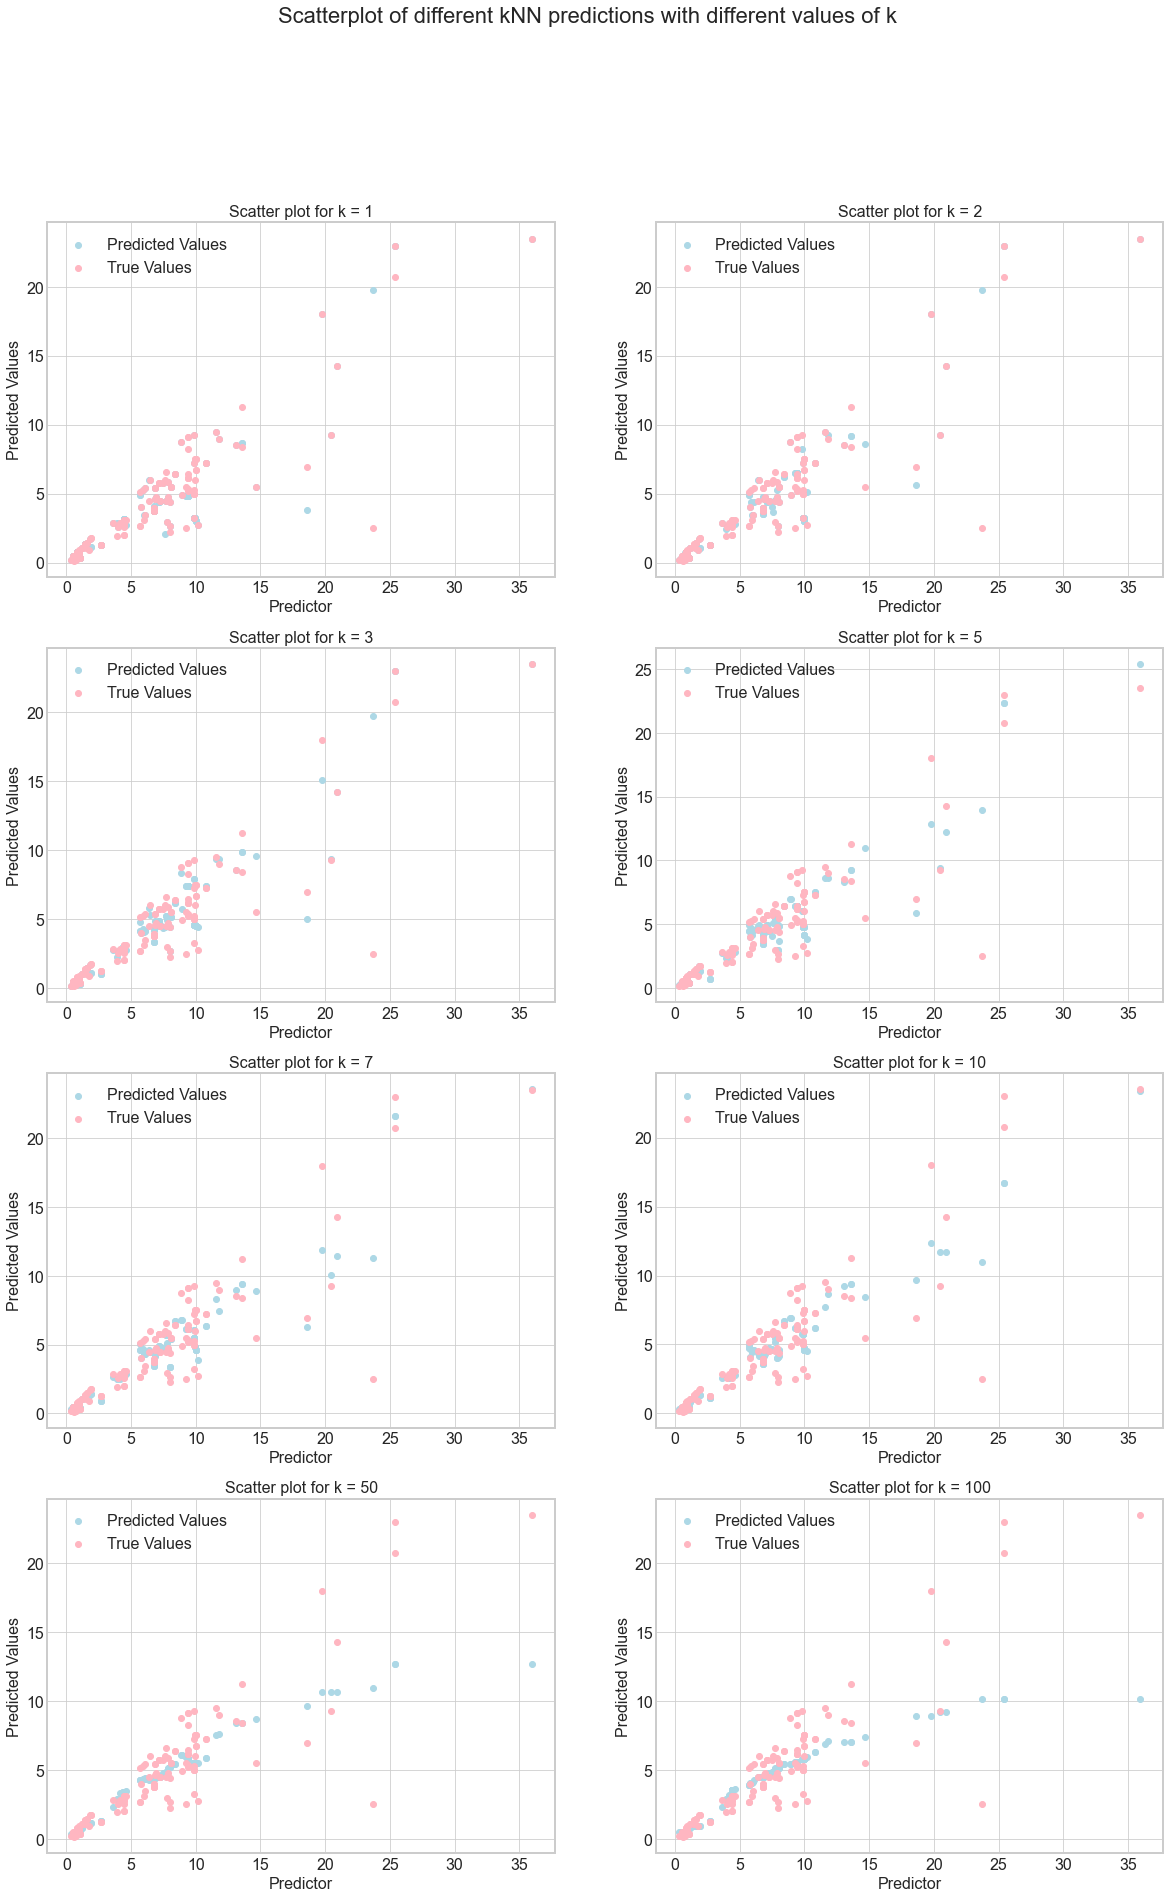

In [16]:
## Fit a kNN regression model to the training set for the following 8 different values of  𝑘 :  𝑘=1,2,3,5,7,10,50,100 .
## and make 8 scatter plots of response vs. predictor for each  𝑘 , arranged in a  4×2  grid. 
## Each figure should have plots of the prediction from the k-NN regression and the actual data points on the same figure, as well as axis labels, title, and legend
k_values = [1, 2, 3, 5, 7, 10, 50, 100]
test_MSEs = []
train_MSEs = []
r2_scores = []
fig, ax = plt.subplots(4, 2, figsize = (20, 30))
plt.suptitle('Scatterplot of different kNN predictions with different values of k')
for i, kneighbor in enumerate(k_values):
    model = KNeighborsRegressor(n_neighbors=kneighbor)
    model.fit(xtrain.values.reshape(-1, 1), ytrain.values.reshape(-1, 1))
    y_pred = model.predict(xtest.values.reshape(-1, 1))
    r2 = model.score(ytest.values.reshape(-1, 1), y_pred)
    r2_scores.append(r2)
    training_pred = model.predict(xtrain.values.reshape(-1, 1))
    ax[i//2, i%2].set_title('Scatter plot for k = '+str(kneighbor))
    ax[i//2, i%2].scatter(xtest, y_pred, color = 'lightblue', label='Predicted Values')
    ax[i//2, i%2].scatter(xtest, ytest, color='lightpink', label='True Values')
    ax[i//2, i%2].set_xlabel('Predictor')
    ax[i//2, i%2].set_ylabel('Predicted Values')
    ax[i//2, i%2].legend()
    test_mse = mean_squared_error(y_pred, ytest)
    test_MSEs.append(test_mse)
    train_mse = mean_squared_error(training_pred, ytrain)
    train_MSEs.append(train_mse)
    

Text(0.5, 1.0, 'Evolution of the MSE with respect to the number of neighbors in the kNN model')

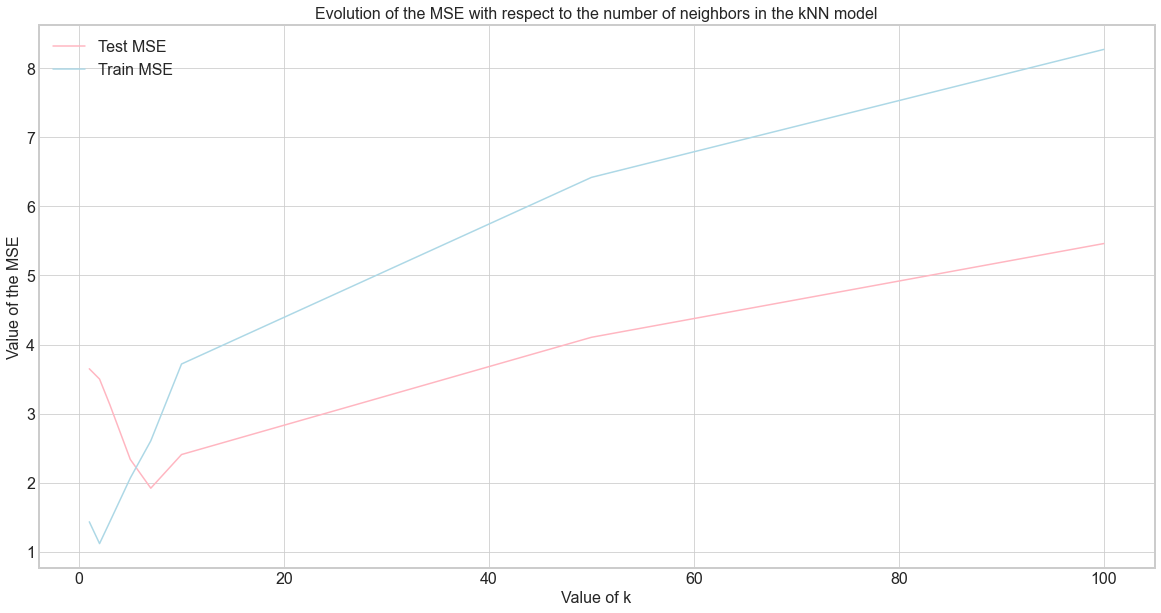

In [17]:
# Now make MSE plots
fig, ax = plt.subplots(1, figsize = (20, 10))
plt.plot(k_values, test_MSEs, color='lightpink', label='Test MSE')
plt.plot(k_values, train_MSEs, color='lightblue', label='Train MSE')
plt.legend(loc='best')
plt.xlabel('Value of k')
plt.ylabel('Value of the MSE')
plt.title('Evolution of the MSE with respect to the number of neighbors in the kNN model')

In [18]:
# Find the best model
print('The best model in terms of test MSE is the one with k = ' + str(k_values[np.argmin(test_MSEs)]) + ' and is equel to: '+str(np.min(test_MSEs)))

The best model in terms of test MSE is the one with k = 7 and is equel to: 1.9218710771725909


In [19]:
##Compute the R-squared for the best model
print(' The R2 score for the best test MSE model is : '+ str(r2_scores[np.argmin(test_MSEs)]))

 The R2 score for the best test MSE model is : 0.5840205309367824


Observations: We are in one of the rare cases where the training MSE is higher than the testing MSE. How can we explain that ? 

<div class='exercise-r'>  
 
**2.2** Discuss your results by answering the following questions.  You should answer the questions directly in a markdown cell of your notebook.
 
 - How does the value of $k$ affect the fitted model?
 
 - If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?
 
 - Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.
 
 - Run the same code by changing the random seed during the train-test split. Do you always get the same answer? If not, why?
 
 </div>

- The value of k first augments the quality of our model and then deteriorates it. This can be explained by the **bias-variance** tradeoff: increasing k first reduces the variance, because the model is less sensitive to some minor changes in the dataset (since the predictions are computed according to more neighbor values) and then increases the bias (because you compute the average on more data points). 
- A k-NN regression model that uses k=n usually will have a very high MSE training error. However, this is a clear case of underfitting the data: this will result in a low complexity model that would generalize poorly to unseen data (a constant prediction). 
- For thois range of k values selected, the training and testing MSE show similar trends: both errors increase with the value of k. If we further augment the k value, we would expect to see a diminishing MSE training error, but a persisting augmenting Testing MSE error. A very low value of k guarantees a good training MSE but a high overfitting of the training data, resulting in poor generalization. A moderately-high value of k is  preventing overfitting and guarantees a good generalization error for the test MSE. A high value of k results in a very rigid model that does not capture the patterns in data, resulting in bad performances for both training and testing data.
- By re-running the code when changing the random seed, the results are not the same. This comes from the fact that the estimators directly depend on the data they see and chainging the training/testing split changes the training of the model. Is also changes the distribution of the testing set, resulting in performances changes (we could have a lucky split, or an unlucky one). 

<div class='exercise'><b> Question 3:  Simple Linear Regression [25 pts]</b>

**3.1** We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables used to model kNN regression.

- You will use the same 75% training and 25% testing split of the data, using the same random_state = 109. 
- Run a Linear Regression model.
- Report the slope/coefficient and intercept values for the fitted linear model.
- Report the $MSE$ for the training and test sets and the $R^2$ from the test set.
- Plot the **residuals** $e = y - \hat{y}$ of the model on the training set as a function of the response variable. Draw a horizontal line denoting the zero residual value on the Y-axis.

**Note:** Use the `sklearn` module for linear regression. This module has built-in functions to summarize the results of regression and produce residual plots. Create a `Linear Regression` model, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. As previously, you may use the `mean_squared_error` function to compute $MSE$.
    
**3.2** Discuss your results by answering the following questions.  

- How does the test $MSE$ score compare with the best test $MSE$ value obtained with k-NN regression? 

- What does the sign of the slope of the fitted linear model convey about the relationship between the predictor and the response?

- Discuss the shape of the residual plot and what it shows for the quality of the model. Be sure to discuss whether or not the assumption of linearity is valid for this data.
    </div>


### Solutions

<div class='exercise-r'>  
 
**3.1** We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables used to model kNN regression.
 
 - You will use the same 75% training and 25% testing split of the data, using the same random_state = 109.
 - Run a Linear Regression model.
 - Report the slope/coefficient and intercept values for the fitted linear model.
 - Report the $MSE$ for the training and test sets and the $R^2$ from the test set.
 - Plot the **residuals** $e = y - \hat{y}$ of the model on the training set as a function of the response variable. Draw a horizontal line denoting the zero residual value on the Y-axis.
 
 **Note:** Use the `sklearn` module for linear regression. This module has built-in functions to summarize the results of regression and produce residual plots. Create a `Linear Regression` model, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. As previously, you may use the `mean_squared_error` function to compute $MSE$.
 
 </div>

In [20]:
# Prepare your data
# your code here


In [21]:
## Fit a linear model to the train data
# your code here
model = LinearRegression()
model.fit(xtrain.values.reshape(-1, 1), ytrain.values.reshape(-1, 1))

LinearRegression()

In [22]:
## Report the slope/coefficient and intercept values for the fitted linear model. 
# your code here
print('The coefficients of the linear regression model fit to the data are ' + str(model.intercept_[0]) + ' for the intercept and '+ str(model.coef_[0][0]) + ' for the slope.')

The coefficients of the linear regression model fit to the data are 0.11236987692104439 for the intercept and 0.6156599214296153 for the slope.


In [23]:
## Report the $MSE$ and $R^2$ from the training and test sets.
MSE_train = mean_squared_error(model.predict(xtrain.values.reshape(-1, 1)), ytrain)
r2_train = r2_score(ytrain.values.reshape(-1, 1), model.predict(xtrain.values.reshape(-1, 1)))
MSE_test = mean_squared_error(model.predict(xtest.values.reshape(-1, 1)), ytest.values.reshape(-1, 1))
r2_test = r2_score(ytest.values.reshape(-1, 1), model.predict(xtest.values.reshape(-1, 1)))
print('The results for the Training set are : MSE '+str(MSE_train) + ' and r2 score : '+ str(r2_train))
print('The results for the Testing set are : MSE '+str(MSE_test) + ' and r2 score : '+ str(r2_test))


The results for the Training set are : MSE 4.713332797955166 and r2 score : 0.78360301169206
The results for the Testing set are : MSE 3.136167052174168 and r2 score : 0.8052856808135865


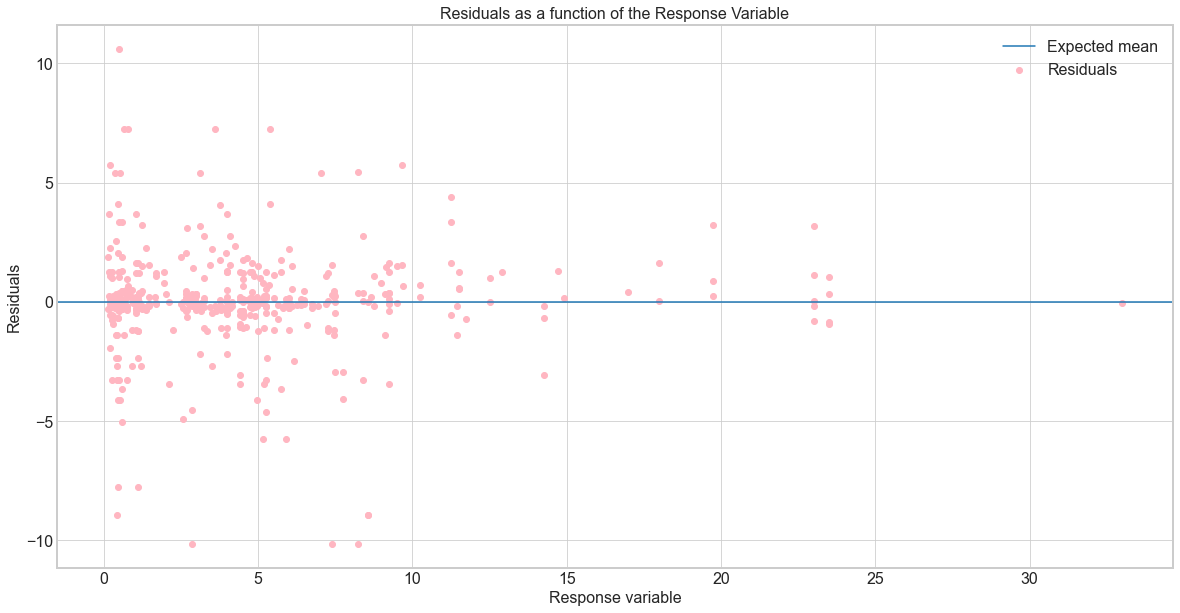

In [24]:
## Plot the **residuals** 
predictions_training_set = model.predict(xtrain.values.reshape(-1, 1))
residuals = ytrain - np.squeeze(predictions_training_set)
residuals = [x for x, _ in (sorted(zip(residuals, ytrain)))]
yplot  = [x for _, x in (sorted(zip(residuals, ytrain)))]
fig, ax = plt.subplots(1, figsize = (20, 10))
plt.scatter(yplot, residuals, color='lightpink', label='Residuals')
plt.axhline(y=0, label = 'Expected mean')
plt.legend(loc='best')
plt.xlabel('Response variable')
plt.ylabel('Residuals')
plt.title('Residuals as a function of the Response Variable')
plt.show()

<div class='exercise-r'>  
 
**3.2** Discuss your results by answering the following questions.
 
 - How does the test $MSE$ score compare with the best test $MSE$ value obtained with k-NN regression?
 
 - What does the sign of the slope of the fitted linear model convey about the relationship between the predictor and the response?
 
 - Discuss the shape of the residual plot and what it shows for the quality of the model. Be sure to discuss whether or not the assumption of linearity is valid for this data.
 </div>

- For the linear model, the test MSE is higher than the best test MSE with k-NN regression. This is also the case for the r2 score. This means that the kNN non parametric method explains in a better way the distribution variance than the parametric Linear Regression method. 
- Since the slope coefficient is positive, this means that the predictor and the response are positively related: when the predictor increases, the response increases. 
- What is expected from the Residuals vs Response plot is to witness no global trend in the shape of the plot and also visualize an accumulation around the expected mean y = 0. This is what is witnessed here: the assumption of linearity could not be contradicted by this plot.  

<div class='exercise'><b> Question 4 (for 209a students, optional for others):  Linear Regression with Feature engineering [10 pts]</b>

**4.1** Creating a new variable from existing data: percentage depreciation

Feature engineering involves transforming data into features that better represent the underlying problem to the predictive models. This results in improved model accuracy on unseen data. 

Our previous regression model relates the Current selling price to the MRP of the car with the equation:

$$CSP = \beta_0 + \beta_1*MRP$$

However, this linear equation does not incorparate other interesting variables such as the ```year of manufacture```, or the ```kms driven```, which may be important factors that affect the overall price of the car. 

Instead of using multi-linear analysis, we can perform some intelligent feature engineering to identify other simple linear relationships within our data.

From practical experience, we know that the percentage drop of a car's price is proportional to the age of the car ([more on car depreciation here](https://www.finder.com/what-is-car-depreciation)). 

Hence, it makes sense to investigate this variable seperately and try to identify possible relationships with other variables.  

Define the percentage depreciation of the Current selling price to the MRP as follows:

$$\textrm{Percentage of the Selling Price}=perc =\frac{MRP - Selling Price}{MRP}$$
    
Create a new column in your dataframe for `perc`
    
    
**4.2** Exploratory Data Analysis

For this section, we will consider `perc` to be our intermediate response variable. To understand the relationship between `perc` and our predictor variables we will perform EDA.

Answer the following questions by plotting graphs.

a) It is seen previosuly that there is a relationship between `Year` and `Current Selling Price`. Is the relationship between `Years` and `perc` the same. If not, how has it changed and why do you think so?

b) Is the trend between the `MRP` and `perc` the same as that between `MRP` and `Current Selling Price`?

c) Does there seem to be a relationship between `Kms_Driven` and `perc` ? 

d) Which is the best predictor to predict `perc`, if there is one? Is it the same as that of `Current Selling price` or has it changed?

**4.3** Perform additional EDA 

Use other plots and statistics to find the best predictor and/or understand the relationship between the other variables and `perc`. One example is given below. It is a plot of `perc` vs `Year` that is color coded based on the `Kms_Driven`.

**4.4** Fitting a Linear Regression model

Based on the previous EDA choose appropriate **feature** variable(s) and **response** variable (`perc`).

- Again, use the same split train-test sets with training data of 75% and testing data of 25%
- Fit a Linear Regression model for each of the predictors.
- Predict the model for the train and test data
- Plot a graph with the test data with predictor variable on the *x* axis and `perc` on the *y* axis. Also plot the fit curve. Ensure you use the correct labels and show the legend.
- Report the $MSE$ score from the training and test sets.
- Find the best model i.e. the best predictor based on the $MSE$ of each model.

**4.5** Predicting The Current Selling Price using ```perc``` 

After performing the above analysis, answer briefly as to why are we getting such a dramatic increase in the R2 score.
    
 </div>

## Solutions

<div class='exercise-r'>  
 
**4.1** Creating a new variable from existing data: percentage depreciation
 
 Feature engineering involves transforming data into features that better represent the underlying problem to the predictive models. This results in improved model accuracy on unseen data.
 
 Our previous regression model relates the Current selling price to the MRP of the car with the equation:
 
 $$CSP = \beta_0 + \beta_1*MRP$$
 
 However, this linear equation does not incorparate other interesting variables such as the ```year of manufacture```, or the ```kms driven```, which may be important factors that affect the overall price of the car.
 
 Instead of using multi-linear analysis, we can perform some intelligent feature engineering to identify other simple linear relationships within our data.
 
 From practical experience, we know that the percentage drop of a car's price is proportional to the age of the car ([more on car depreciation here](https://www.finder.com/what-is-car-depreciation)).
 
 Hence, it makes sense to investigate this variable seperately and try to identify possible relationships with other variables.
 
 Define the percentage depreciation of the Current selling price to the MRP as follows:
 
 $$\textrm{Percentage of the Selling Price}=perc =\frac{MRP - Selling Price}{MRP}$$
 
 Create a new column in your dataframe for `perc`
 
 
 </div>

In [25]:
# your code here
df['perc'] = (df['MRP'].values - df['Current_Selling_Price'].values)/df['MRP'].values

<div class='exercise-r'>  
 
**4.2** Exploratory Data Analysis
 
 For this section, we will consider `perc` to be our intermediate response variable. To understand the relationship between `perc` and our predictor variables we will perform EDA.
 
 Answer the following questions by plotting graphs.
 
 a) It is seen previosuly that there is a relationship between `Year` and `Current Selling Price`. Is the relationship between `Years` and `perc` the same. If not, how has it changed and why do you think so?
 
 b) Is the trend between the `MRP` and `perc` the same as that between `MRP` and `Current Selling Price`?
 
 c) Does there seem to be a relationship between `Kms_Driven` and `perc` ?
 
 d) Which is the best predictor to predict `perc`, if there is one? Is it the same as that of `Current Selling price` or has it changed?
 
 </div>

a)

Text(0, 0.5, 'perc')

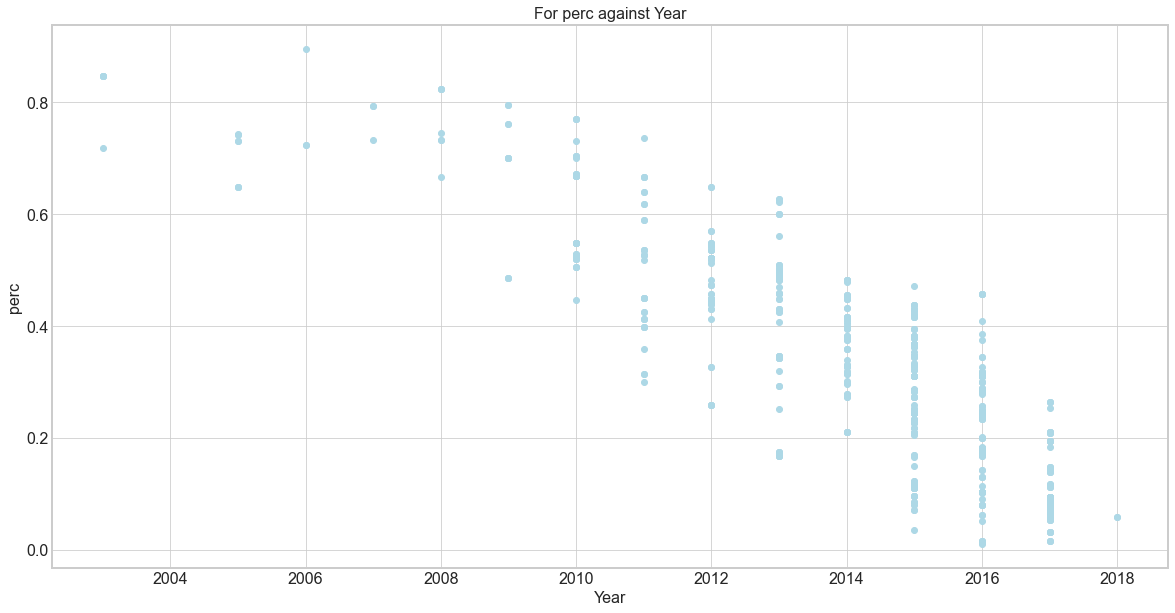

In [26]:
# your code here
fig, ax = plt.subplots(1, figsize = (20, 10))
plt.title('Scatter plot of perc against Year')
ax.scatter(df['Year'], df['perc'], color='lightblue')
ax.set_title('For perc against Year')
ax.set_xlabel('Year')
ax.set_ylabel('perc')

The variables Year and Current Selling price were positively correlated: the more recent the car was, the more expensive it could be sold. Here, the opposite takes place, the more recent the car is, the less depreciated it is.  

b)

Text(0, 0.5, 'perc')

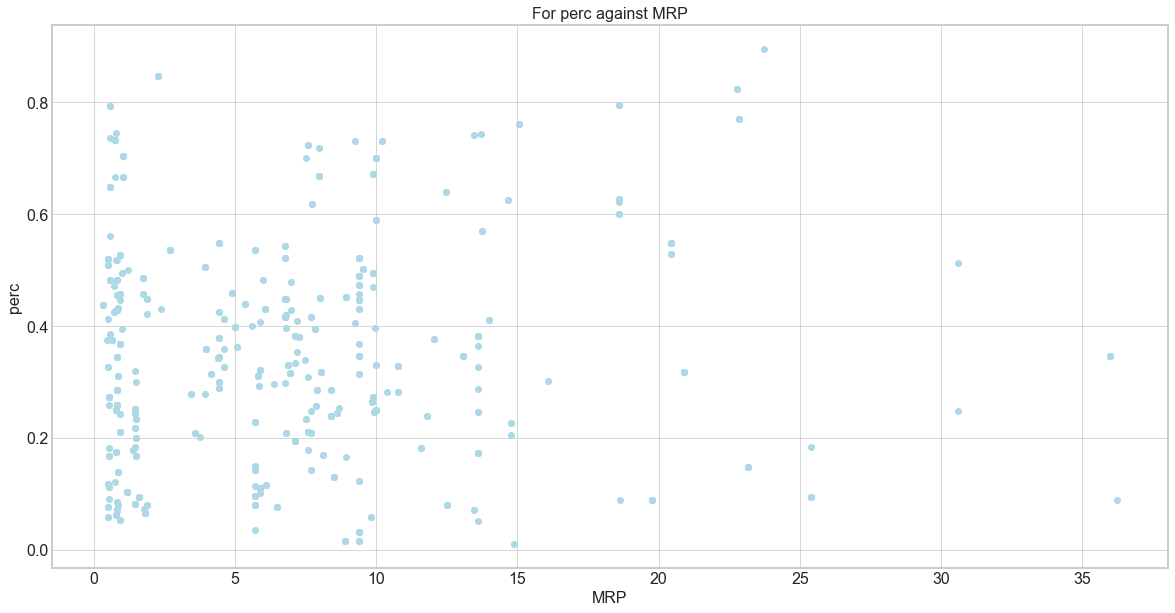

In [27]:
# your code here
fig, ax = plt.subplots(1, figsize = (20, 10))
plt.title('Scatter plot of perc against MRP')
ax.scatter(df['MRP'], df['perc'], color='lightblue')
ax.set_title('For perc against MRP')
ax.set_xlabel('MRP')
ax.set_ylabel('perc')

The trends are not the same. Formerly, we could observe a clear and distinct relationship between the Current Selling Price and MRP. Now, the points are scattered, without showing obvious pattern in the relationship between perc and MRP. 

c)

Text(0, 0.5, 'perc')

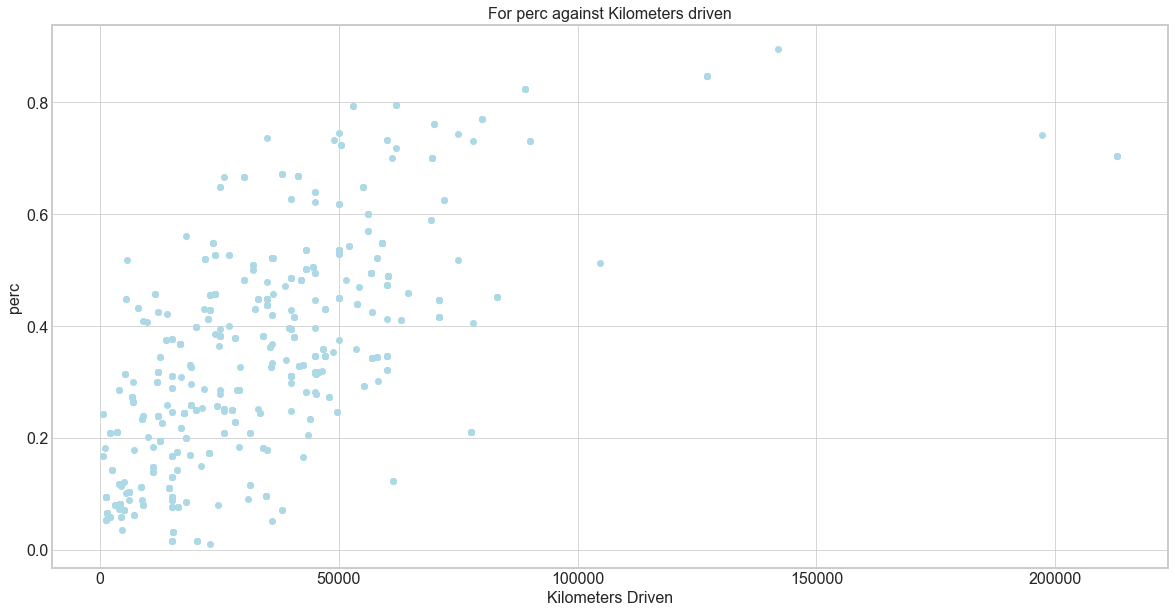

In [28]:
# your code here
fig, ax = plt.subplots(1, figsize = (20, 10))
plt.title('Scatter plot of perc against Kilometers Driven')
ax.scatter(df['Kms_Driven'], df['perc'], color='lightblue')
ax.set_title('For perc against Kilometers driven')
ax.set_xlabel('Kilometers Driven')
ax.set_ylabel('perc')

There definitely seems to be a relationship between perc and Kilometers Driven . Visually, I would say that a square root would efficiently model the dependency. 

d)

I would say that, $\textbf{only according to the visualizations}$ performed, the best single predictor to predict perc would be Kilometers Driven. I would also go with the Year predictor, although it is quite tedious to work with categorical variables as only predictor. 

The 'best predictor' has changed (there was absolutely that it would remain the same). 

<div class='exercise-r'>  
 
**4.3** Perform additional EDA
 
 Use other plots and statistics to find the best predictor and/or understand the relationship between the other variables and `perc`. One example is given below. It is a plot of `perc` vs `Year` that is color coded based on the `Kms_Driven`.
 
 </div>

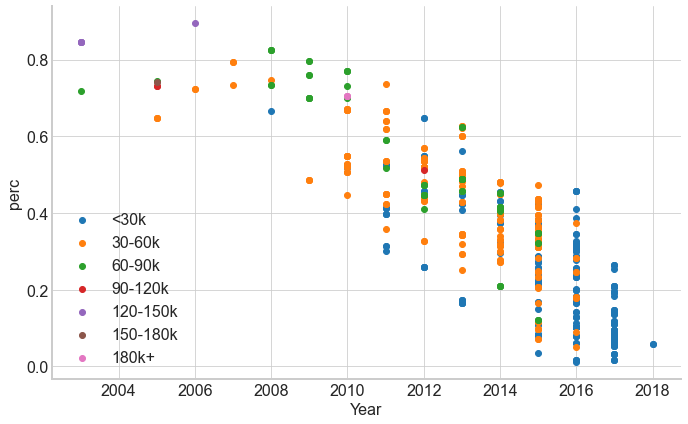

In [29]:
newdf = df.copy()

newdf['bins'] = np.int64(df.Kms_Driven/30000)

bins = newdf.bins.unique()

bins.sort()

fg = sns.FacetGrid(data= newdf, hue = 'bins',hue_order = bins,
                  height = 6, aspect = 1.61)
fg.map(plt.scatter, 'Year','perc')
plt.legend(['<30k','30-60k','60-90k','90-120k','120-150k','150-180k','180k+'],loc='lower left');

In [30]:
# your code here


<div class='exercise-r'>  
 
**4.4** Fitting a Linear Regression model
 
 Based on the previous EDA choose appropriate **feature** variable(s) and **response** variable (`perc`).
 
 - Again, use the same split train-test sets with training data of 75% and testing data of 25%
 - Fit a Linear Regression model for each of the predictors.
 - Predict the model for the train and test data
 - Plot a graph with the test data with predictor variable on the *x* axis and `perc` on the *y* axis. Also plot the fit curve. Ensure you use the correct labels and show the legend.
 - Report the $MSE$ score from the training and test sets.
 - Find the best model i.e. the best predictor based on the $MSE$ of each model.
 
 </div>

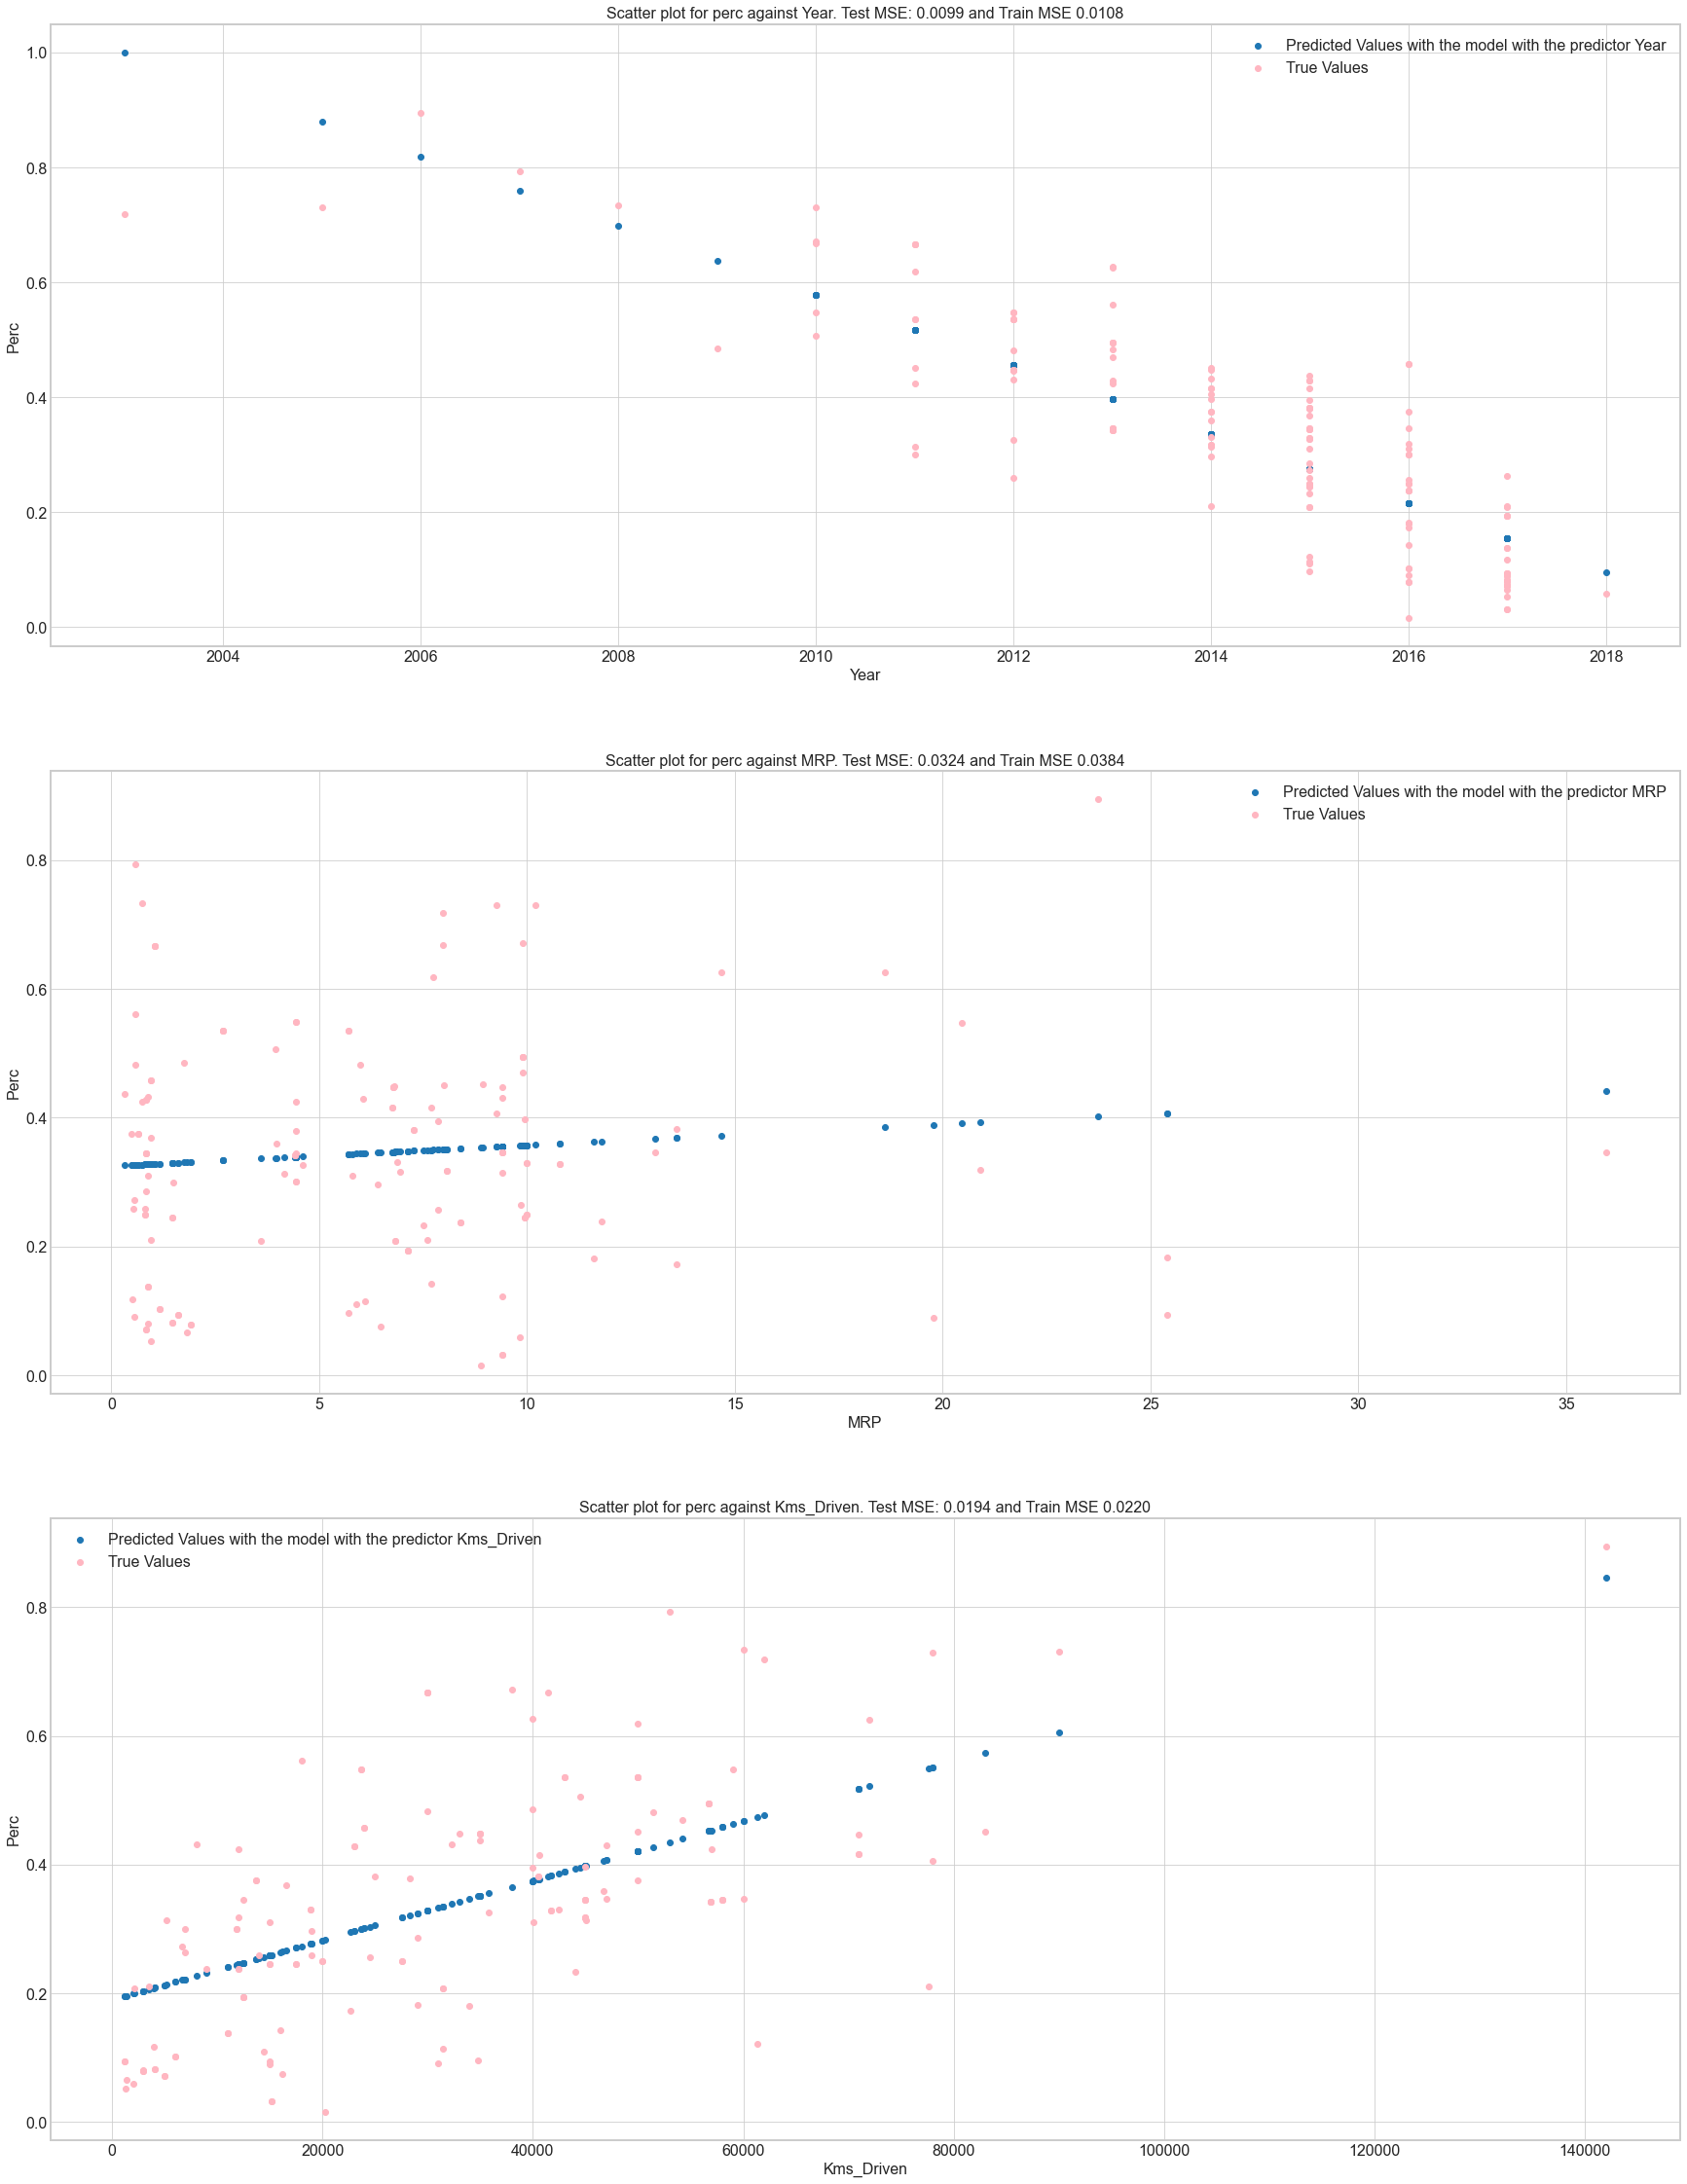

In [31]:
# your code here
predictors = ['Year', 'MRP', 'Kms_Driven']
y = df['perc']
fig, axes = plt.subplots(3, figsize = (30, 40))
plt.rcParams['font.size'] = 30
for i, predictor in enumerate(predictors): 
    x = df[predictor]
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.75, random_state = 109)
    model = LinearRegression()
    model.fit(xtrain.values.reshape(-1, 1), ytrain.values.reshape(-1, 1))
    y_pred = model.predict(xtest.values.reshape(-1, 1))
    MSE_train = mean_squared_error(model.predict(xtrain.values.reshape(-1, 1)), ytrain)
    MSE_test = mean_squared_error(model.predict(xtest.values.reshape(-1, 1)), ytest)
    axes[i].set_title('Scatter plot for perc against '+str(predictor)+'. Test MSE: '+str(MSE_test)[:6] + ' and Train MSE '+str(MSE_train)[:6])
    axes[i].scatter(xtest, y_pred, label='Predicted Values with the model with the predictor '+str(predictor))
    axes[i].scatter(xtest, ytest, color='lightpink', label='True Values')
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel('Perc')
    axes[i].legend()

In [32]:
# your code here


In [33]:
# your code here


- First, the fact that the MSEs are so low is explained by the fact that Perc ranges between 0 and 1 and therefore, taking the square of small values yields to smaller values.  
- According to the test MSEs, the best predictor in order to predict the perc variable is Year.

<div class='exercise-r'>  
 
**4.5** Predicting The Current Selling Price using ```perc```
 
 After performing the above analysis, answer briefly as to why are we getting such a dramatic increase in the R2 score.
 
 </div>

Ce que tu dois faire, LR with year to model perc and then solve for Current Selling price the equation, and insted of using perc you use the one simulated: insert perc and MRP. Linear Regression. 
Solve for the Current Selling Price: the equation you get is x and then the y is current selling price and then Linear Regression. 

### First, simulate a perc population via our previous model predicting perc from year

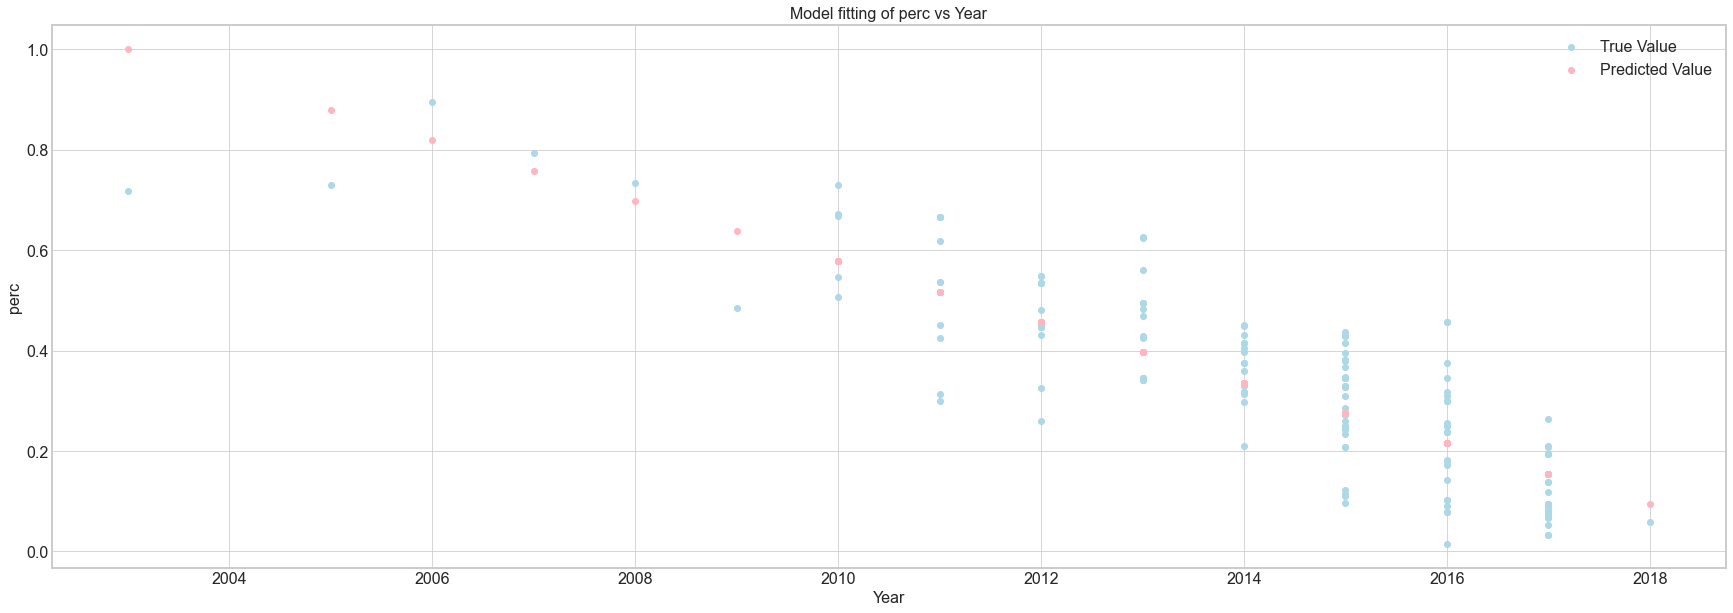

The coefficients of our regression line are (121.89107271529002, -0.060354916721732224)


In [34]:
# your code here
x = df['Year']
y = df['perc']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 109)
model = LinearRegression().fit(xtrain.values.reshape(-1, 1), ytrain.values.reshape(-1, 1))
plt.subplots(1, figsize = (30, 10))
plt.title('Model fitting of perc vs Year')
plt.scatter(xtest, ytest, label='True Value', color='lightblue')
plt.scatter(xtest, model.predict(xtest.values.reshape(-1, 1)), label='Predicted Value', color='lightpink')
plt.xlabel('Year')
plt.ylabel('perc')
plt.legend()
plt.show()
intercept = model.intercept_[0]
slope = model.coef_[0][0]
print('The coefficients of our regression line are ('+str(intercept)+', '+str(slope)+')')

In [35]:
perc = intercept + df['Year']*slope

### Second, use the equation in order to create an equation for Current Selling Price

$$
perc =\frac{MRP - Selling Price}{MRP} \iff Selling Price = MRP(1 - perc)
$$
Therefore, we are going to perform Linear Regression for Current Selling Price against MRP(1-Perc)

In [36]:
x = df['MRP']*(1 - perc)
y = df['Current_Selling_Price']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.75, random_state=109)
model = LinearRegression().fit(xtrain.values.reshape(-1, 1), ytrain.values.reshape(-1, 1))
predictions = model.predict(xtest.values.reshape(-1, 1))
test_r2 = r2_score(ytest.values.reshape(-1, 1), predictions)

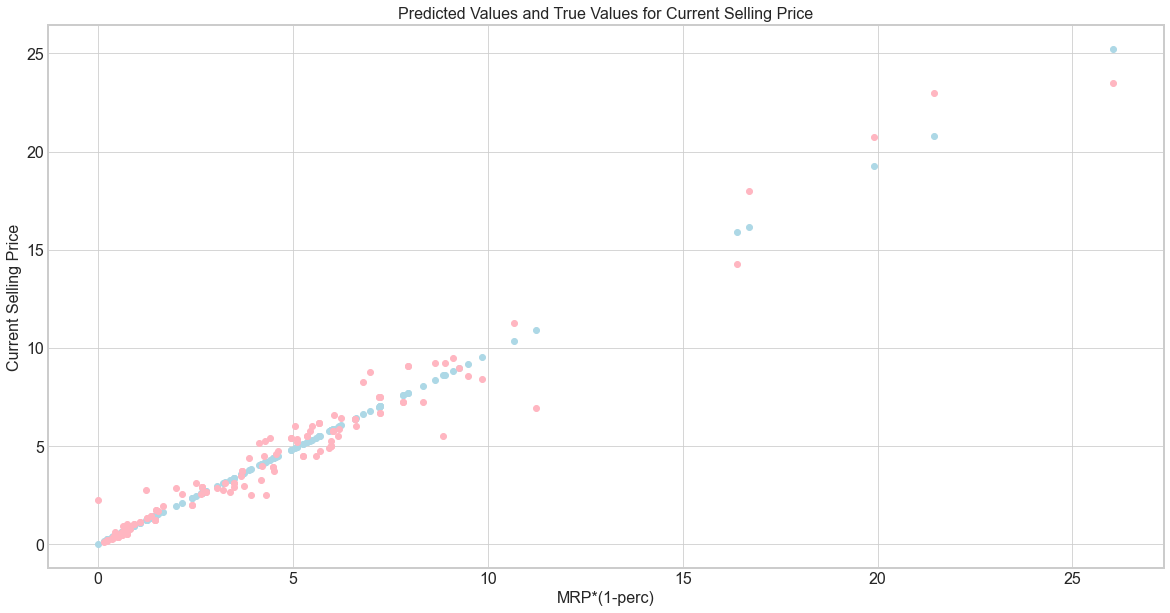

The r2 score for this model is  0.9628347327874782


In [37]:
plt.subplots(1, figsize = (20, 10))
plt.scatter(xtest, predictions, label='Predictions', color = 'lightblue')
plt.scatter(xtest, ytest, label='True values', color = 'lightpink')
plt.xlabel('MRP*(1-perc)')
plt.ylabel('Current Selling Price')
plt.title('Predicted Values and True Values for Current Selling Price')
plt.show()
print('The r2 score for this model is ', test_r2)

The explanation for such a dramatic increase in our approach is that there has been some $\textbf{information leakage}$: we have used the target to create the feature perc, and then used this feature to predict the target: this approach is wrong since the feature predicting Current Selling Price would have already seen some of our test data. 

<div class="theme"> Part Β :  Multi-Linear Regression</div> 

### Problem Description: 

Analysis of publically available profiles on simplymarry.com to learn more about the biases, income disparity & other interesting trends in India. 

#### Dataset

The dataset was aggregated from the SimplyMarry.com site and given in `Income_prediction.csv'.

All the attributes refer to traits and preferences of the person looking for a spouse. 

- **age** - Age of person looking for a spouse
- **gender** - Female:0, Male:1 
- **height** - Height in inches
- **bmi** - BMI calculated based on height and weight
- **eating** - {'Doesn't Matter':0, 'Jain': 1, 'Vegetarian': 2, 'Vegetarian With Eggs': 3, 'Non Vegetarian': 4}
- **family_type** - ('Doesn't Matter': 0, 'Others':3, 'Nuclear': 1, 'Joint family both parents': 2, 'Joint family only mother':2, 'Joint family father mother and brothers sisters':2, 'Joint family single parent brothers and or sisters':2, 'Joint family only father': 2)
- **status** - If social status matters to the person looking for a spouse: {'Doesn't Matter': 0, 'Middle Class': 1, 'Upper Middle Class': 2, 'High Class': 3, 'Rich / Affluent': 4}
- **manglik** - {'No': 0, 'Yes': 1, 'Do Not Know': 2} ([More on this feature](https://en.wikipedia.org/wiki/Mangala_Dosha))
- **drinking** - {'Doesn't Matter':0, 'No': 1, 'Occasionally': 2, 'Yes': 3}
- **complexion** - {'Very Fair ': 1, 'Fair ': 2, 'Wheatish ':3, 'Wheatish Medium ': 4, 'Dark':5}
- **body** - {'Slim': 1, 'Average': 2, 'Heavy': 3, 'Athletic': 4}
- **education** - {'High School':0, 'Some college':1,'Undergrad':2, 'Grad':3, 'Doctorate':4}
- **city** - ('International': 1, 'Mumbai': 2, 'Delhi':3, 'Kolkata':4,'Bengaluru':5, 'Chennai':6, 'Hyderabad':7, 'Pune':8, 'Ahmedabad':9,'Surat':10, 'Vishakapatnam':11, 'Others':12)
- **income** - {Annual income in dollars}

*source: Harvard IACS*

#### Sensitive attributes in the data

It is thought that users are mostly sincere when stating their preferences about their desired partner, and are less likely to hide any deeply held cultural or sociological biases or preferences in order to be perceived as being politically or socially "correct". This might take care of the problem with surveys where responses touching on social norms are notorious for self-report bias, referred to as "social desirability bias." However, the possibility of bias persists; it might be possible to imagine somebody selecting that drinking "doesn't matter" but they might still have some type of preference, unconscious or conscious. 

This is a dataset designed to help us think about issues of bias and social issues in datasets. We hope that you will be able to derive insights into the above mentioned sociological biases. The data could potentially provide answers to interesting questions with associated policy ramifications, such as a possible relationship between bias and factors like education, local environment, or age.


<div class='exercise'><b> Question 5:   Using Data science to learn more about Indian society [25 pts]</b>

First we are going to use simple analytics to learn more about Indian society with the help of this dataset.

The idea is to use basic modeling based on averages & sample distributions to uncover suspected biases, such as gender, skin tone & manglik status.

Answer the below questions using plots & simple statistics.

**5.1** Is there a disparity in income of participants by gender? Consider using a log scale or another technique to communicate clearly.

**5.2** Is there a relationship between income and the "eating" variable? Is there a relationship between income and skin complexion? It is possible to consider skin complexion as an ordinal variable; consider whether retaining this ordering as in the dataset might be preferable to considering skin complexion as a categorical variable lacking order. 

**5.3** Is there a discernable trend in the incomes of participants from different regions/cities?

**5.4** Is there a clear trend between BMI and the income?

**5.5** Does the level of education show a clear trend with income? Is the trend similar across both levels of the "gender" variable available in this dataset?

**5.6** Do any of the numeric attributes show a clear non-linear dependence with the amount of income?

**5.7** Is the income lower or high for those living in 'nuclear' families?

**5.8** What is the average effect of the 'Manglik' variable on income?
    
</div>

### Solutions

<div class='exercise-r'>  
 
**5.1** Is there a disparity in income of participants by gender? Consider using a log scale or another technique to communicate clearly.
 
 </div>

In [38]:
# your code here 
df2 = pd.read_csv('data/Income_prediction.csv')

### Categorical Plot with outliers

Text(0.5, 1.0, 'Gender vs Income')

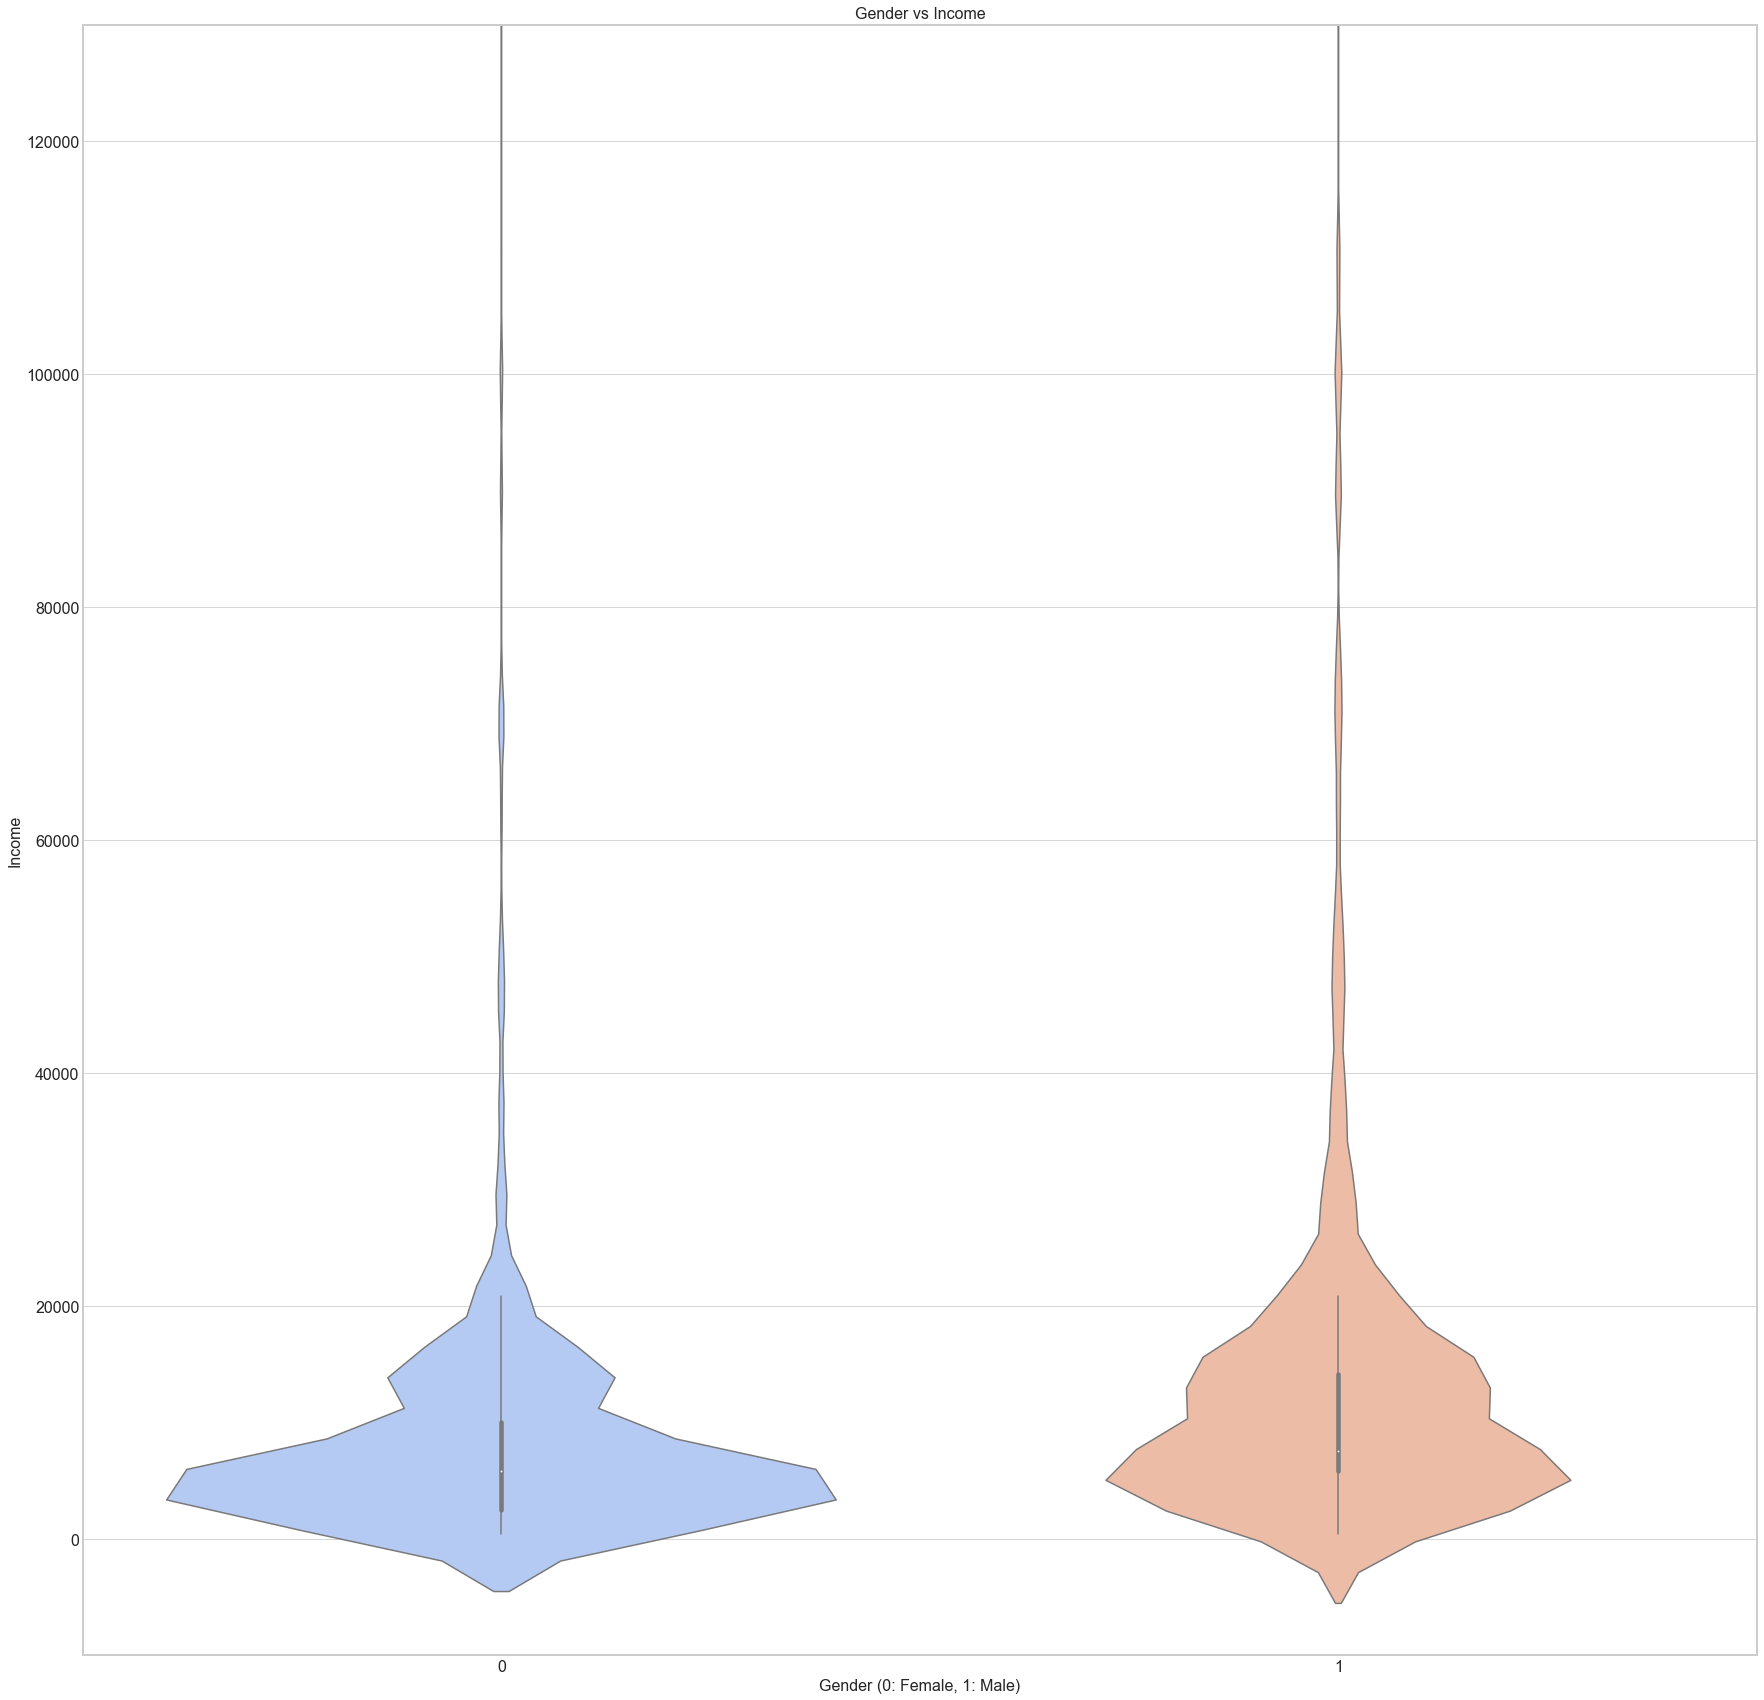

In [39]:
# your code here
plt.figure(figsize = (30, 30))
sns.violinplot(x = 'gender', y='income', data=df2, palette='coolwarm')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Income')
plt.ylim(-10000, 130000)
plt.title('Gender vs Income')

According to the plot, we could infer that there is a dispartity in income of participants by gender. We could further explore this assumption

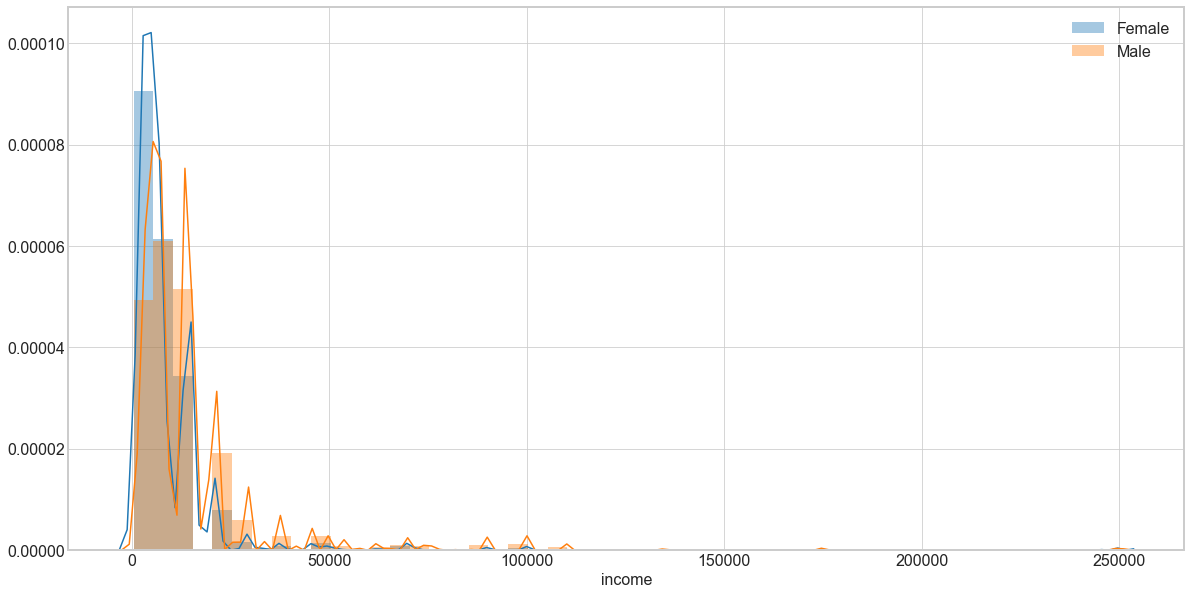

In [40]:
plt.subplots(1, figsize = (20, 10))
sns.distplot(df2[df2['gender']==0]['income'], label = 'Female')
sns.distplot(df2[df2['gender']==1]['income'], label = 'Male')
plt.legend()


Therefore, there is a disrepancy in volume (the women occupy all of the income spectrum but are less represented). Can this be explained by the fact that the data comprises more men than women ? Maybe more men fill the form in SimplyMarry.com than women. 

<AxesSubplot:xlabel='gender', ylabel='count'>

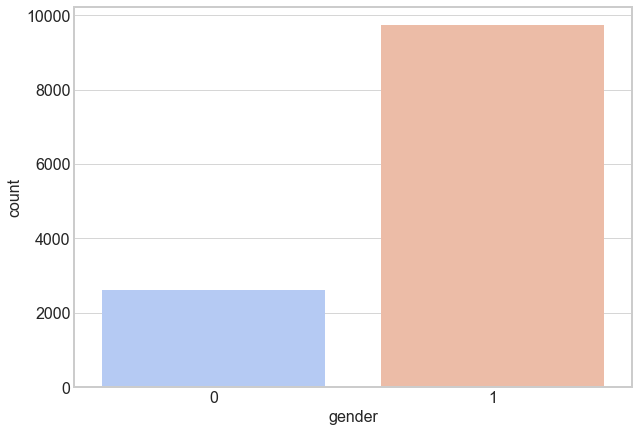

In [41]:
plt.figure(figsize = (10, 7))
sns.countplot(x='gender', data=df2, palette='coolwarm')

Based on this data, I would not conclude that there is a disrepancy in income of participants by gender. 

<div class='exercise-r'>  
 
**5.2** Is there a relationship between income and the "eating" variable? Is there a relationship between income and skin complexion? It is possible to consider skin complexion as an ordinal variable; consider whether retaining this ordering as in the dataset might be preferable to considering skin complexion as a categorical variable lacking order.
 
 </div>

In order to explore whether a relationship exists between a continuous variable and a categorical variable, it would be useful to plot categorical graphs, in order to see if the distribution of the continous variable is substantially different when varying the categorical predictor.  

### Between income and the "eating" variable

(0.0, 140000.0)

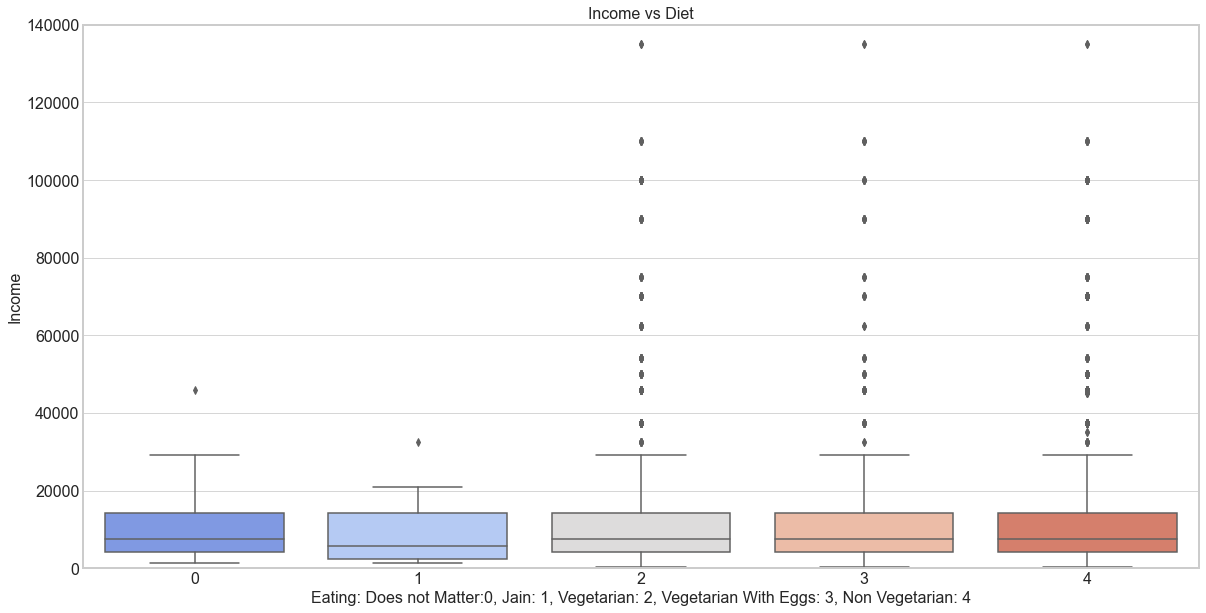

In [42]:
X = df2['eating']
y = df2['income']
plt.subplots(1, figsize = (20, 10))
sns.boxplot(x = 'eating', y = 'income', data=df2, palette='coolwarm')
plt.xlabel('Eating: Does not Matter:0, Jain: 1, Vegetarian: 2, Vegetarian With Eggs: 3, Non Vegetarian: 4')
plt.ylabel('Income')
plt.title('Income vs Diet')
plt.ylim(0, 140000)


According to the above scatter plot, there seems to be $\textbf{low, no}$ difference in income between being part of group 0 or 1 and being part of group 2, 3 or 4. However, there appearsto be a slight difference in income between being in one of those 2 super groups ({0, 1} or {2, 3, 4}). $\textbf{Let us evaluate more precisely if the distributions are that close.}$

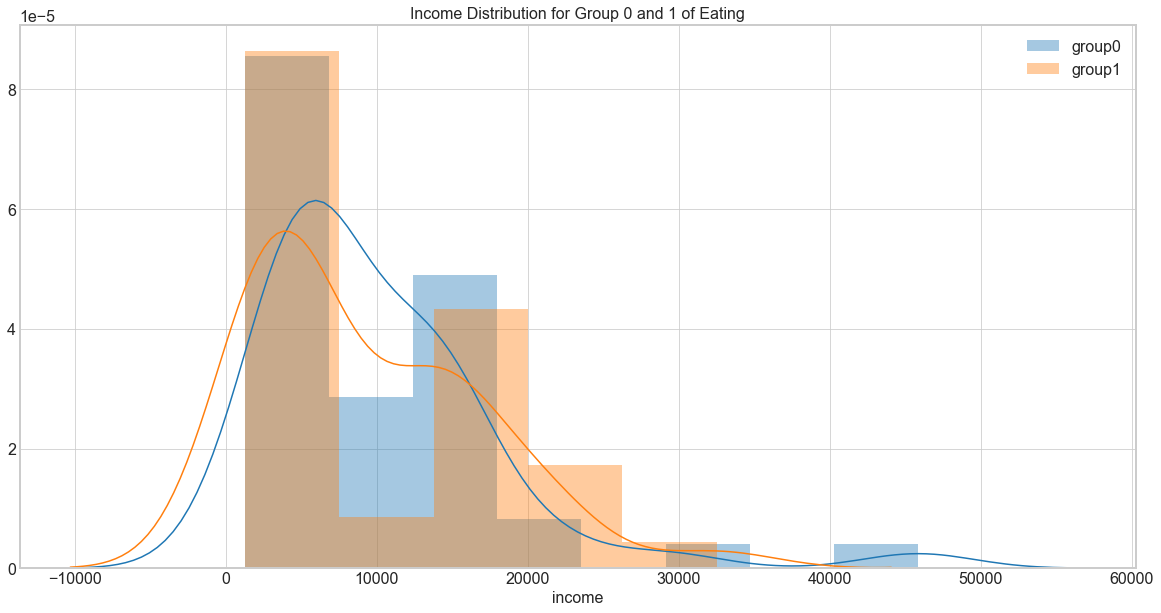

In [43]:
plt.subplots(1, figsize = (20, 10))
sns.distplot(df2[df2['eating']==0]['income'], label = 'group0')
sns.distplot(df2[df2['eating']==1]['income'], label = 'group1')
plt.legend()
plt.title('Income Distribution for Group 0 and 1 of Eating')
plt.show()

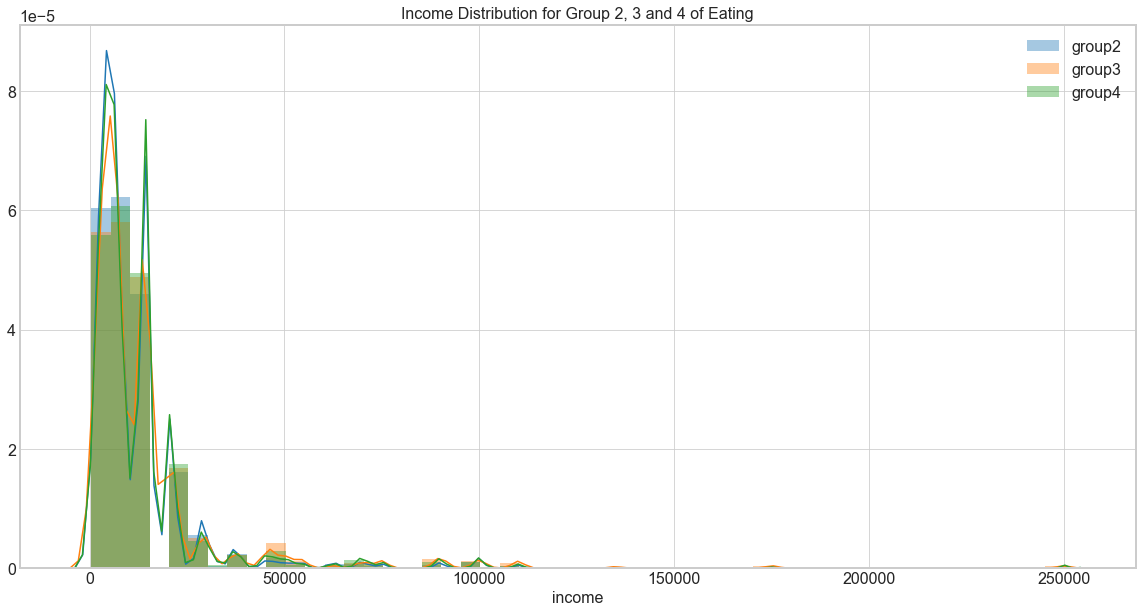

In [44]:
plt.subplots(1, figsize = (20, 10))
sns.distplot(df2[df2['eating']==2]['income'], label = 'group2')
sns.distplot(df2[df2['eating']==3]['income'], label = 'group3')
sns.distplot(df2[df2['eating']==4]['income'], label = 'group4')
plt.legend()
plt.title('Income Distribution for Group 2, 3 and 4 of Eating')
plt.show()

Therefore, as stated beforehand, there is a slight difference in income when being part of groups 0 and 1 or being part of groups 2, 3 and 4.  

### Between Income and skin complexion variable

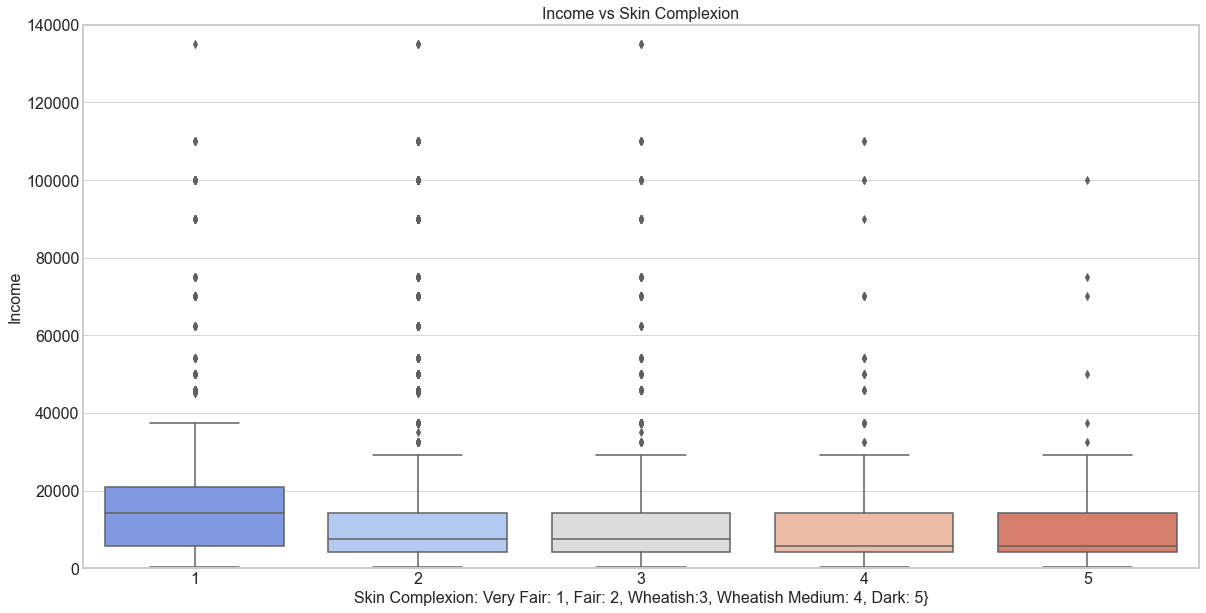

In [45]:
# your code here 
plt.subplots(1, figsize = (20, 10))
sns.boxplot(x = 'complexion', y='income', data=df2, palette='coolwarm')
plt.xlabel('Skin Complexion: Very Fair: 1, Fair: 2, Wheatish:3, Wheatish Medium: 4, Dark: 5}')
plt.ylabel('Income')
plt.ylim(0, 140000)
plt.title('Income vs Skin Complexion')
plt.show()


Visually, we can see that there is no obvious relationship between Income and skin complexion. We could further evaluate the distributions but we would come up with the same conclusion as above. Being part of groupd 1 of Skin Complexion might be an indicator that the income is higher but this is not enough to deduce a relationship. 

Based on our task of income prediction based on the different features,I would not retain Skin Complexion as an ordinal variable. Indeed, as we could see from the above boxplot, there is no obvious ordering or ranking of the different categories of skin complexion when considering the Income variable.

<div class='exercise-r'>  
 
**5.3** Is there a discernable trend in the incomes of participants from different regions/cities?
 
 </div>

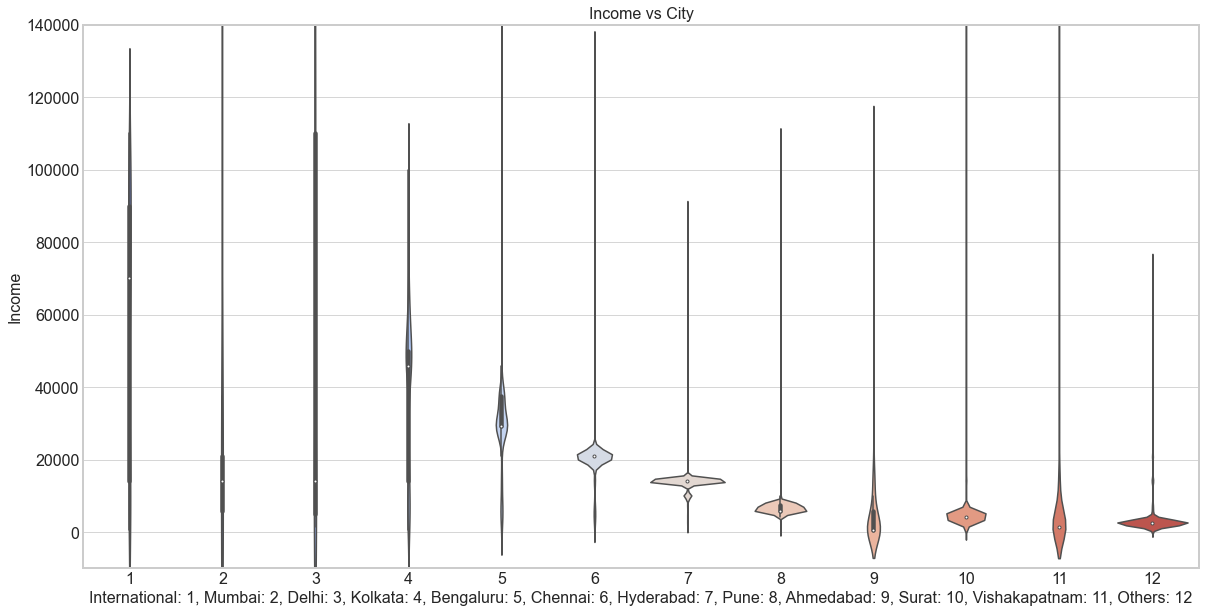

In [46]:
# your code here
plt.subplots(1, figsize = (20, 10))
sns.violinplot(x = 'city', y='income', data=df2, palette='coolwarm')
plt.xlabel('International: 1, Mumbai: 2, Delhi: 3, Kolkata: 4, Bengaluru: 5, Chennai: 6, Hyderabad: 7, Pune: 8, Ahmedabad: 9, Surat: 10, Vishakapatnam: 11, Others: 12')
plt.ylabel('Income')
plt.ylim(-10000, 140000)
plt.title('Income vs City')
plt.show()

<AxesSubplot:xlabel='city', ylabel='count'>

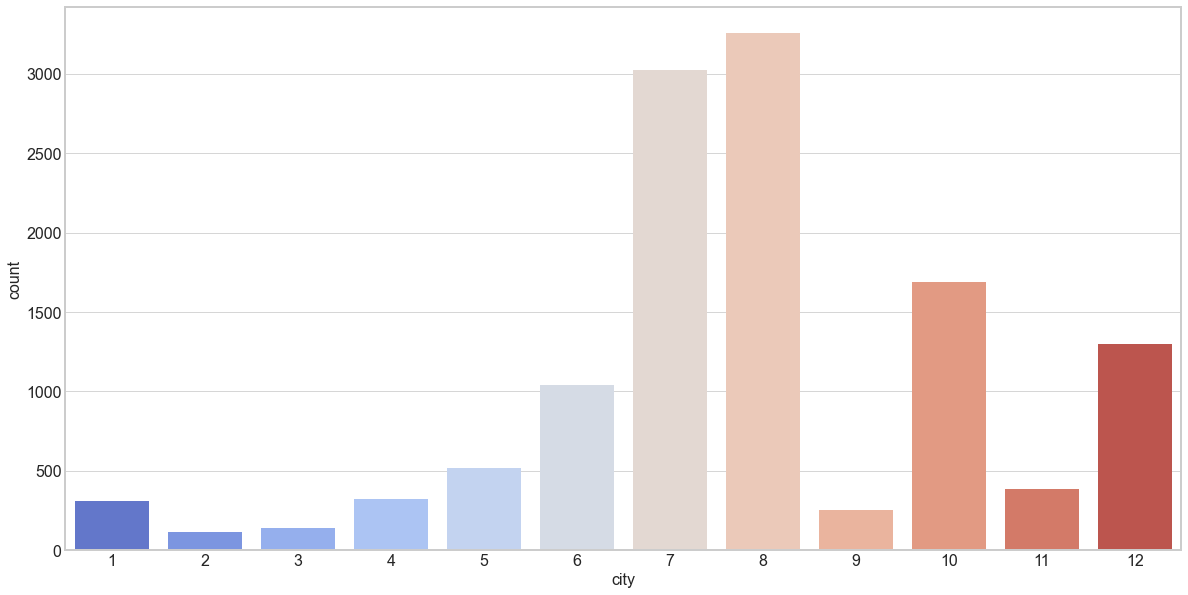

In [47]:
plt.figure(figsize = (20, 10))
sns.countplot(x='city', data=df2, palette='coolwarm')

In [48]:
import warnings
warnings.filterwarnings('ignore')


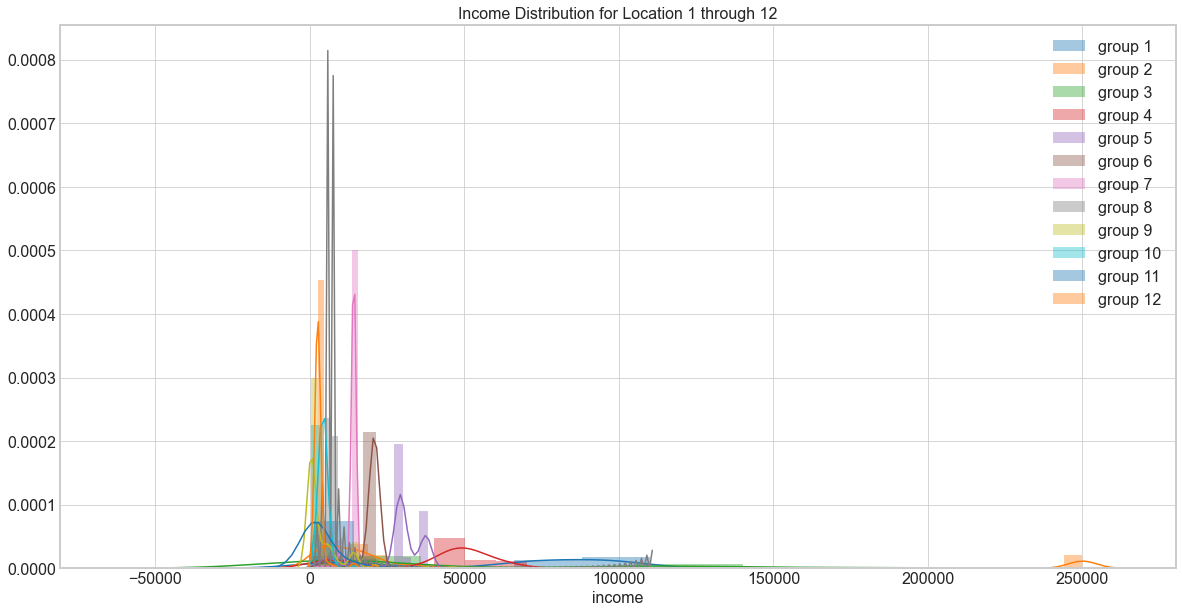

In [49]:
plt.subplots(1, figsize = (20, 10))
for i in range(1, 13):
    sns.distplot(df2[df2['city']==i]['income'], label = 'group '+str(i))
plt.legend()
plt.title('Income Distribution for Location 1 through 12')
plt.show()

We can see that there is a discernable trend in the incomes of participants from different regions/cities: the participants from a same region/city tend to have similar incomes, that are quite different across different regions. This predictor might be of great help when trying to predict the income. 

<div class='exercise-r'>  
 
**5.4** Is there a clear trend between BMI and the income?
 
 </div>

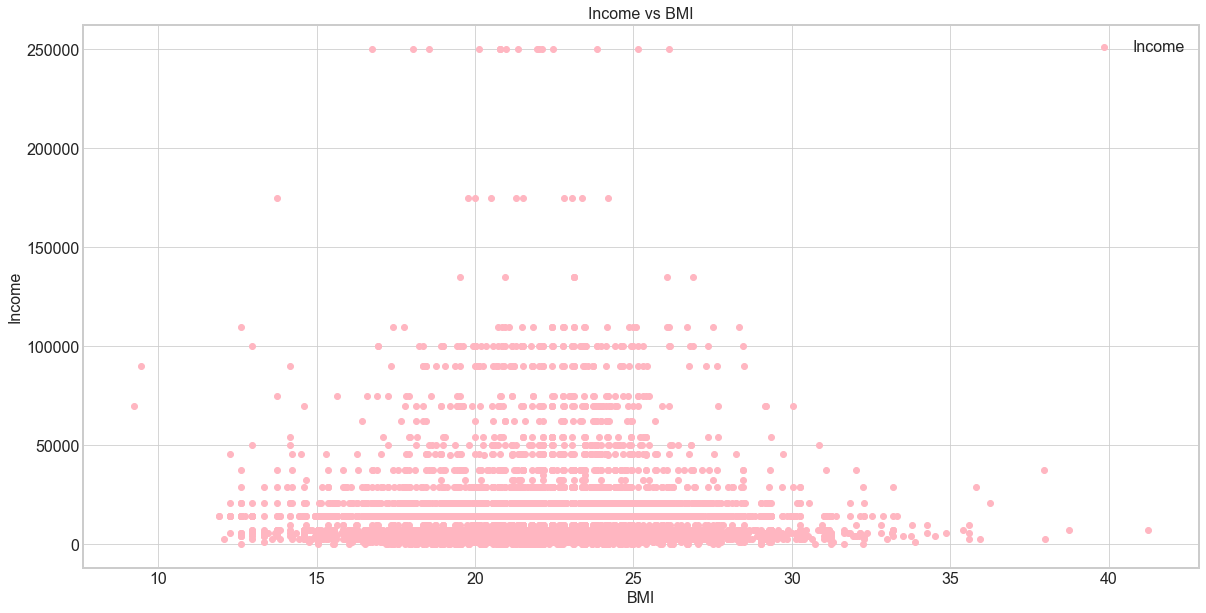

In [50]:
# your code here
X = df2['bmi']
y = df2['income']
plt.subplots(1, figsize = (20, 10))
plt.scatter(X, y, color = 'lightpink', label='Income')
plt.xlabel('BMI')
plt.ylabel('Income')
plt.title('Income vs BMI')
plt.legend()

I do not see any clear trend between BMI and the income either. The clear information that this plot gives us is that most of the population has a bmi between 15 and 30, but does not inform us on how does the income vary with BMI.

<div class='exercise-r'>  
 
**5.5** Does the level of education show a clear trend with income? Is the trend similar across both levels of the "gender" variable available in this dataset?
 
 </div>

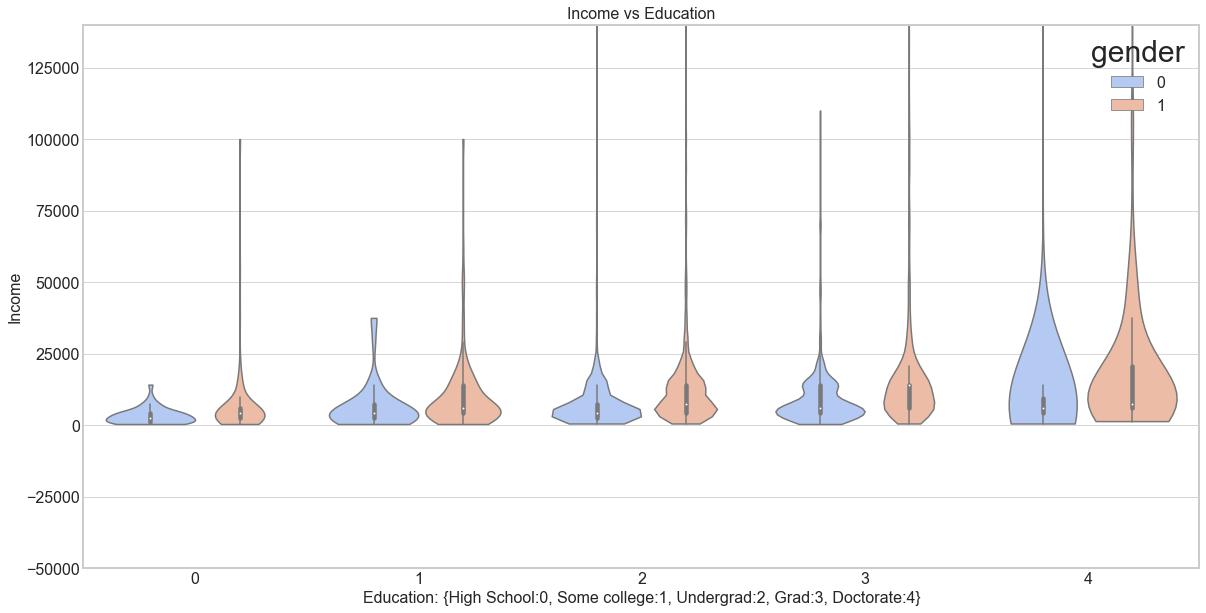

In [51]:
# your code here
plt.subplots(1, figsize = (20, 10))
sns.violinplot(x = 'education', y='income', hue='gender', data=df2, cut=0, palette='coolwarm')
plt.xlabel('Education: {High School:0, Some college:1, Undergrad:2, Grad:3, Doctorate:4}')
plt.ylabel('Income')
plt.ylim(-50000, 140000)
plt.title('Income vs Education')
plt.show()

I believe the level of education show a clear trend with income:the more educated you are, the more likely you are to have high income. This trend seems to be similar across both levels of the 'gender' variable.

<div class='exercise-r'>  
 
**5.6** Do any of the numeric attributes show a clear non-linear dependence with the amount of income?
 
 </div>

There are 3 numerical attributes in this dataset: Age, Height and bmi. We have already explored bmi so we still need to work with $\textbf{age}$ and $\textbf{height}$.

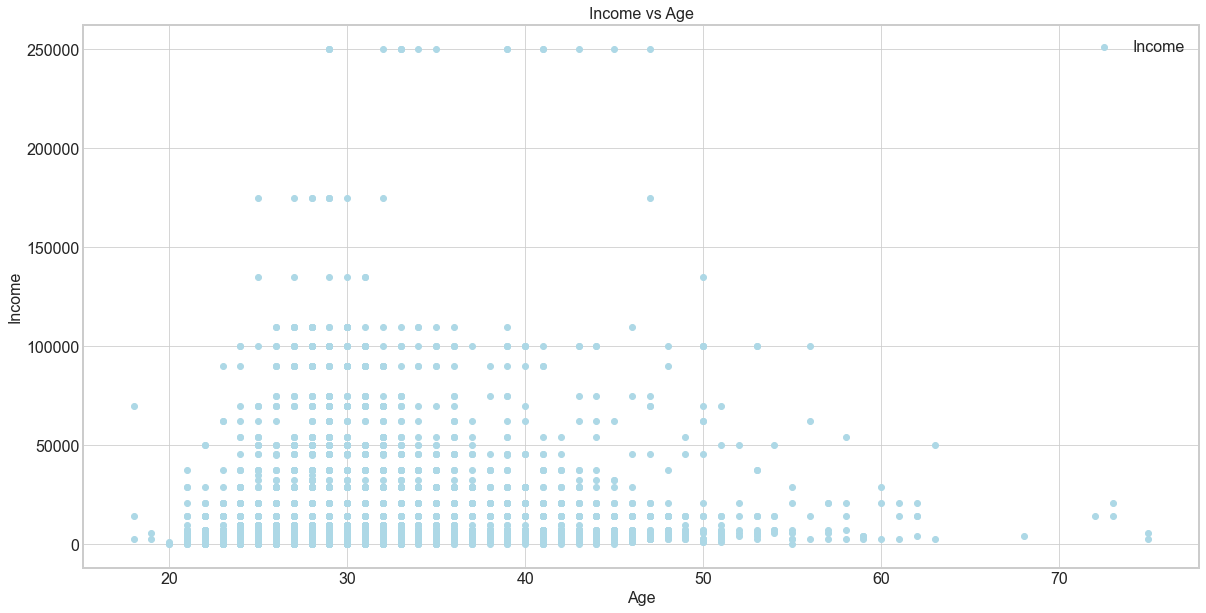

In [52]:
# your code here
X = df2['age']
y = df2['income']
plt.subplots(1, figsize = (20, 10))
plt.scatter(X, y, color='lightblue', label='Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Income vs Age')
plt.legend()

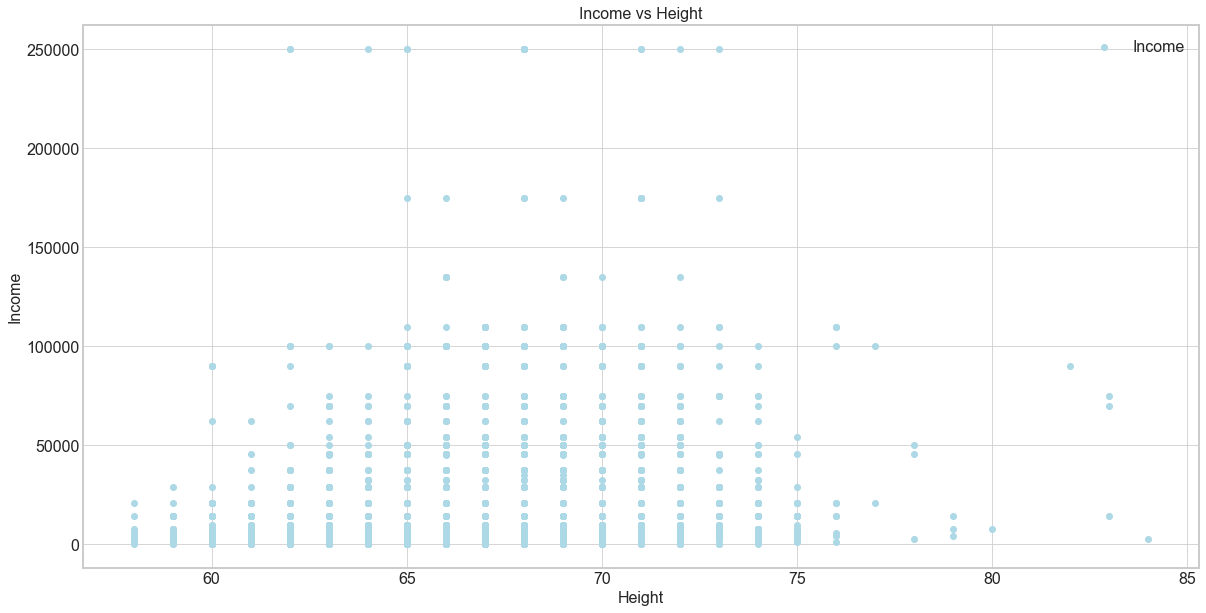

In [53]:
# your code here
X = df2['height']
y = df2['income']
plt.subplots(1, figsize = (20, 10))
plt.scatter(X, y, color='lightblue', label='Income')
plt.xlabel('Height')
plt.ylabel('Income')
plt.title('Income vs Height')
plt.legend()

Neither of the two numeric attributes Height and Age show a clear dependence (linear or not) with the amount of income. 

<div class='exercise-r'>  
 
**5.7** Is the income lower or high for those living in 'nuclear' families?
 
 </div>

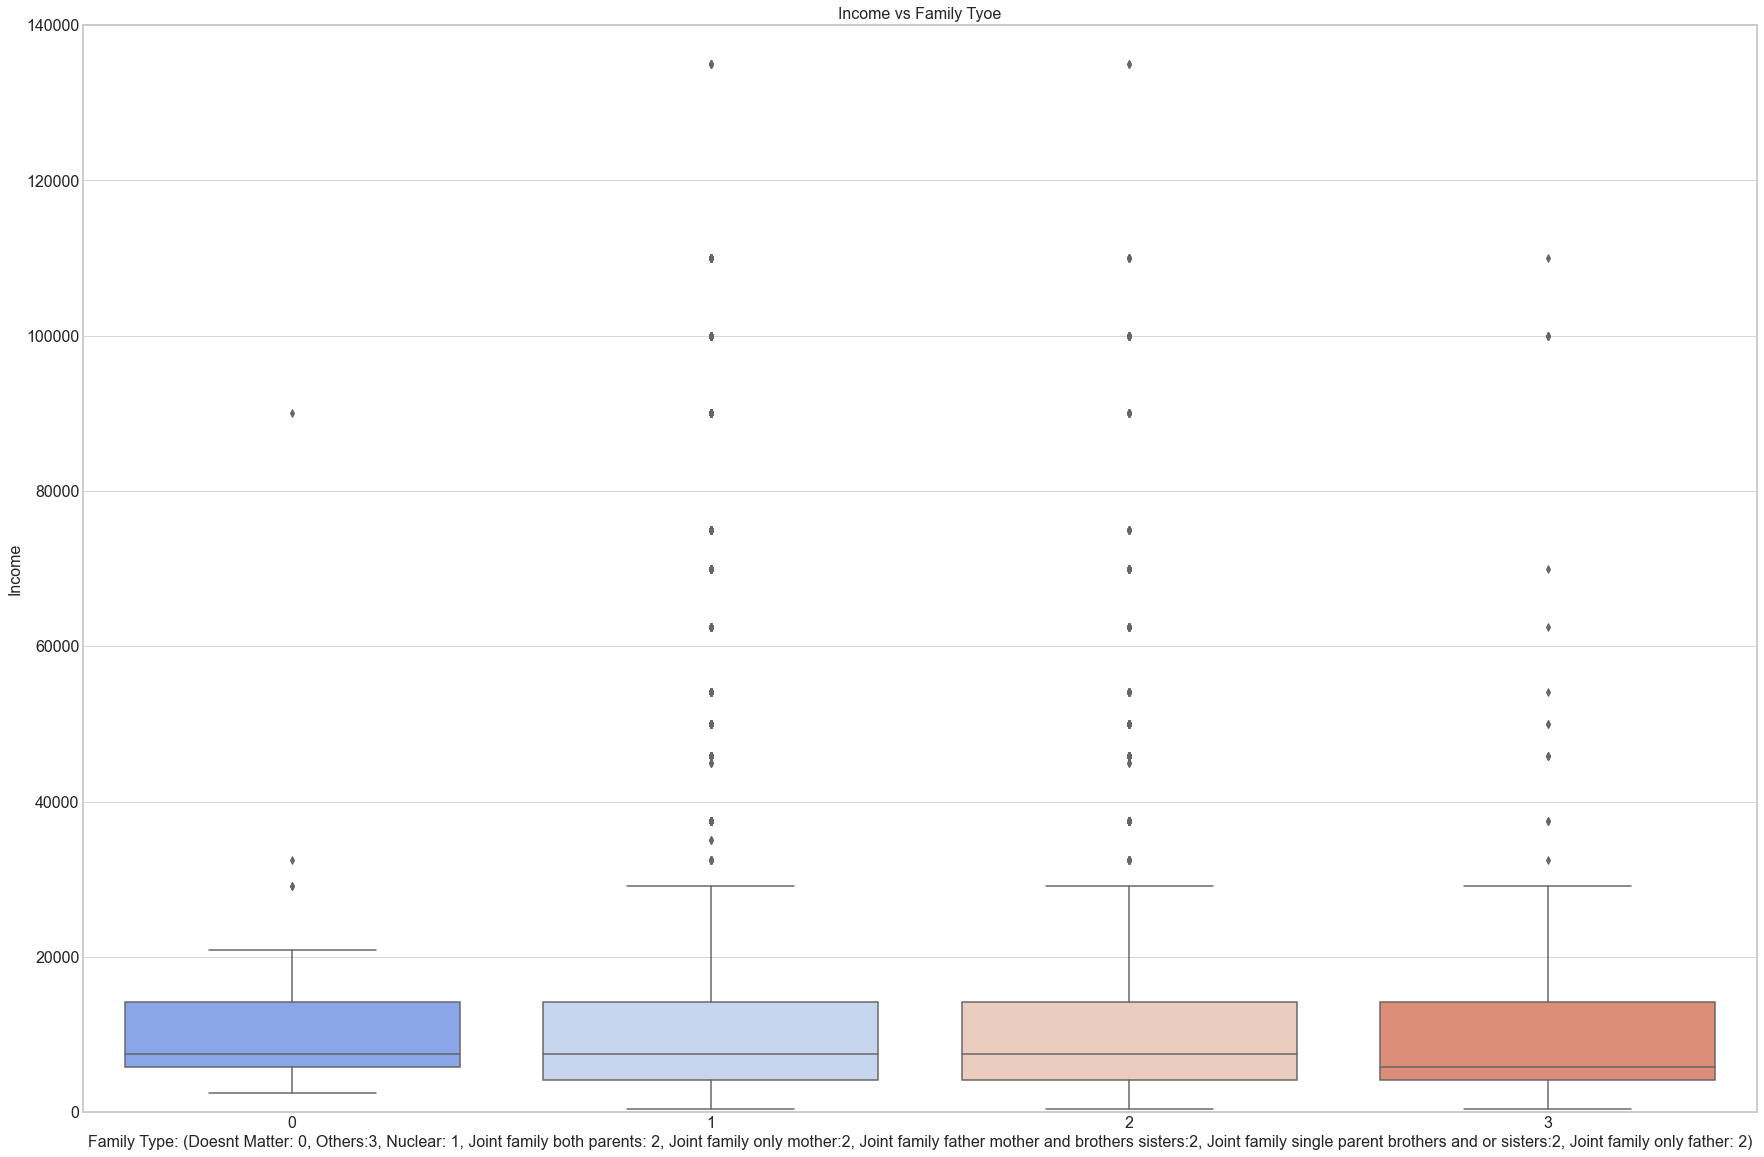

In [54]:
# your code here
plt.subplots(1, figsize = (30, 20))
sns.boxplot(x = 'family_type', y='income', data=df2, palette='coolwarm')
plt.xlabel('Family Type: (Doesnt Matter: 0, Others:3, Nuclear: 1, Joint family both parents: 2, Joint family only mother:2, Joint family father mother and brothers sisters:2, Joint family single parent brothers and or sisters:2, Joint family only father: 2)')
plt.ylabel('Income')
plt.ylim(0, 140000)
plt.title('Income vs Family Tyoe')
plt.show()

From what we can see in this plot, for those living in 'nuclear' families, the income is quite similar to the others. Family type does not seem to have very much impact on Income Distribution.  

<div class='exercise-r'>  
 
**5.8** What is the average effect of the 'Manglik' variable on income?
 
 </div>

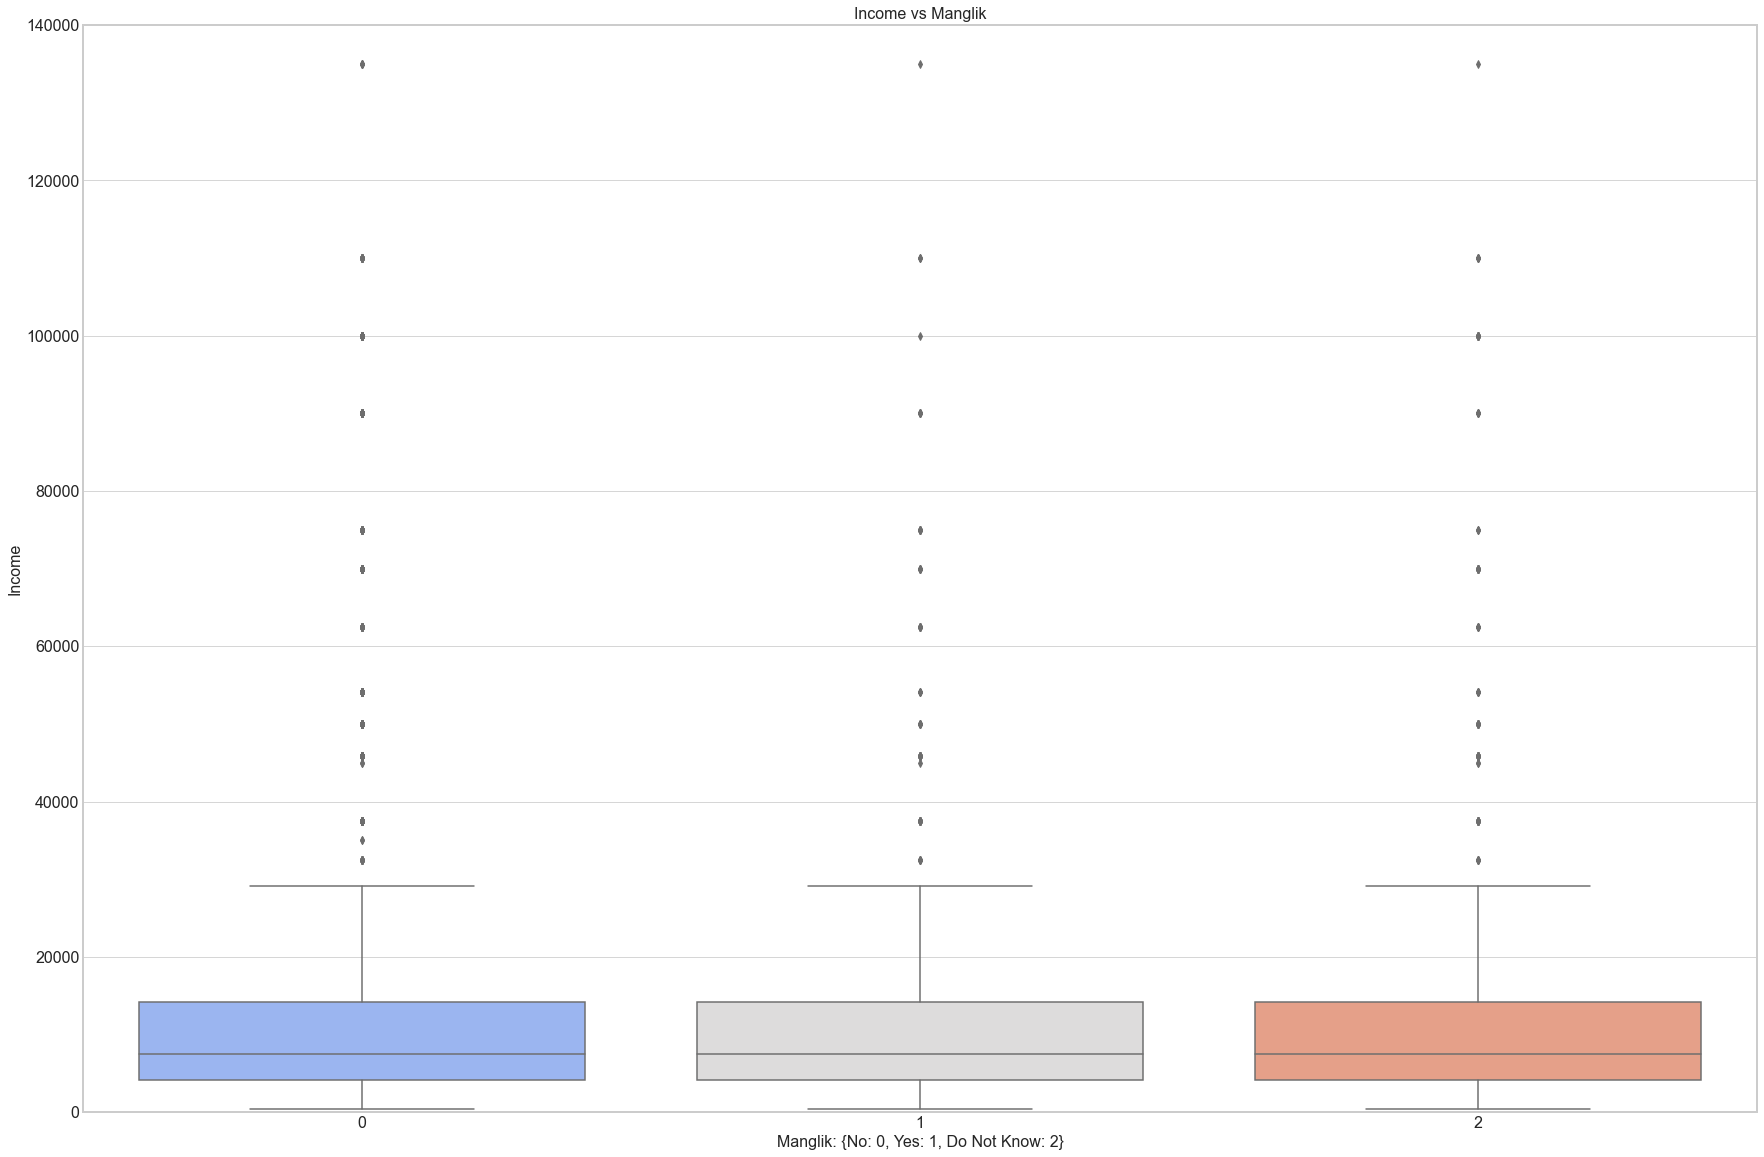

In [55]:
# your code here
plt.subplots(1, figsize = (30, 20))
sns.boxplot(x = 'manglik', y='income', data=df2, palette='coolwarm')
plt.xlabel('Manglik: {No: 0, Yes: 1, Do Not Know: 2}')
plt.ylabel('Income')
plt.ylim(0, 140000)
plt.title('Income vs Manglik')
plt.show()

The 'Manglik' variable does not seem to have any effect on income: the incomes of the population does not seem to depend on the 'manglik' variable.

<div class='exercise'><b> Question 6:  Calculate the Gini Index [15 pts]</b>


Gini coefficients are often used to quantify income inequality, read more [here](http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm).

The Gini coefficient is defined by the formula:

$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini Index of 0 implies perfect income equality, whereas a gini index close to 1 implies a concentration of wealth among the richest few.

**6.1** Based on the above formula, calculate the Gini coffient for the income of the participants of this dataset

**6.2** Compare your gini index with other countries.

According to the [world bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the gini index of South Africa is 0.6 while that of Ukrain is 0.25. 

Based on your calculated Gini index value for this dataset, what is your conclusion on the relationship of the income disparity in the three countries?

Do the data source, self-report nature of the data, or sampling procedure affect your conclusions? If so, how?
    
</div>

### Solutions

<div class='exercise-r'>  
 
**6.1** Based on the above formula, calculate the Gini coffient for the income of the participants of this dataset
 
 </div>

In [56]:
# your code here
X = df2.sort_values(by='income', ascending=True, ignore_index=True)
indexes_to_drop = X[X['city']=='International'].index.values
X.drop(indexes_to_drop, axis=0, inplace=True)
Y = pd.DataFrame(np.unique(X['income']))
new_indexes = []
for value in np.squeeze(Y.values):
    new_index = np.mean(X[X['income']==value].index.values)
    for i in range(len(X[X['income']==value])):
         new_indexes.append(new_index)
X.index = new_indexes
n = len(X)
multiplicator = np.asarray([2*i - n -1 for i in range(1, n+1)])
Gini_index = np.sum(np.asarray(multiplicator)*np.asarray(np.squeeze(X['income'].values)))/(n*np.sum(np.squeeze(X['income'].values)))
print('Based on the incomes of the participants reported in this Dataset, the Gini index of India is '+str(Gini_index))

Based on the incomes of the participants reported in this Dataset, the Gini index of India is 0.49719966570155616


What I did above is computing the Gini Index with a special technique in order to break the ties. What I decided is to break the ties by computing the average rank of the tied values and assign this rank to every tied income. Based on this modification, I subsequently computed the Gini index of the population. 

<div class='exercise-r'>  
 
**6.2** Compare your gini index with other countries.
 
 According to the [world bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the gini index of South Africa is 0.6 while that of Ukrain is 0.25.
 
 Based on your calculated Gini index value for this dataset, what is your conclusion on the relationship of the income disparity in the three countries?
 
 Do the data source, self-report nature of the data, or sampling procedure affect your conclusions? If so, how?
 
 </div>

Based on the calculated Gini index value for this dataset, the income disparities in India would be lower than the ones in South Africa but higher than the ones in Ukraine. I would not take this conclusion as a confident one. 

Several concerns arise when trusting this evaluation of the Gini index:
- Personal Computation: I made a choice when computing the Gini index: group all equal values and then consider those equal values as a single value. This is a means of easing the computation of the rank for ties. 
- Data Source: We have absolutely no information on how the website provides us with this data. 
- Self-report nature of the data: There are no ways to guarante that incomes reported are reliable. One could easily report a higher salary than his actual because he thinks his/her partner would value more a candidate with a higher income.
- Sampling procedure: We try to estimate a nation-wide quantity (coefficient of inequality) based on a sample of the population that visit a precise website. This would maybe result in computing the inequalities amongst a very specific group of the population (maybe essentially single people between 20 and 35 with a smartphone ..) and does not allow to have a reliable sample of the Indian population. 

Therefore, in order to see if this Gini index evaluation is right or not, I tried to find the true Gini index in order to see whether they are close or not. 

In [57]:
# your code here
import requests as re
from bs4 import BeautifulSoup

In [58]:
code = re.get('https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings')
soup = BeautifulSoup(code.text)
countries = [(soup.findAll('a')[7:174])[i].text for i in range (166)]
countries = countries[:159]
gini_indexes = [soup.findAll(class_ = "r")[i].text for i in range(159)]

In [59]:
for i, country in enumerate(countries):
    if country=='India':
        print(float(gini_indexes[i])/100)

0.35700000000000004


<div class='exercise'><b> Question 7 (for 209a students, optional for others):  Multi-Linear Regression [10 pts]</b>

Now we increase the scope of our analysis to solve another problem that is related to income of the participants.
</div>

![](https://github.com/hargun3045/blog-dump/blob/master/modi.png?raw=true)

Owing to a large number of people underreporting their income to evade taxes, the Income Tax Department of India wants you, an esteemed data scientist, to build a machine learning model that can predict the income of a given tax-payer based on commonly available information.

This will help the department red flag suspected individuals who may show discernable trends of earing high values of income but are excessively under-reporting on their annual income.

The goal is to build the best model with the given dataset, using both categorical and continuous predictors that are available.

As with all other homework problems, this is a learning exercise; in the real world, it is your decision to choose the types of data science projects you will work on as well as which clients you will work with. 

Fit a multiple linear regression model to the training set.
Use the `sklearn` library.

#### Deliverables
Your code should be contained in a Jupyter notebook cell.  An appropriate level of comments is necessary.  Your code should run and output the required outputs described below.

#### Required Outputs
- Fit a multiple linear regression model on the training set
- Predict on train and test sets
- Calculate the MSE for the train & test set
- Report the $R^2$ score on the test set.
- Make a plot of Residuals vs Log of predicted values $\hat{y}$, with residuals on the $Y$-axis and predicted values on the $X$-axis. Use the formula ${\epsilon} = y - \hat{y}$ to compute the residual values. Include a horizontal line denoting the zero residual value on the $Y$-axis.
- Plot a histogram of the magnitudes of the residuals.

#### Optional Outputs
You are encouraged to experiment with ways to improve your model *after first reporting results with only the required outputs*. Some ideas are given below:
- Polynomial terms for continous variables
- Interaction terms between variables
- Feature selection among given predictors


### A first rather simple model: Multi-Linear Regression on the entire DataSet

,Training,Testing
MSE,1.85e+08,2.054e+08
r2,NA,3.447e-01


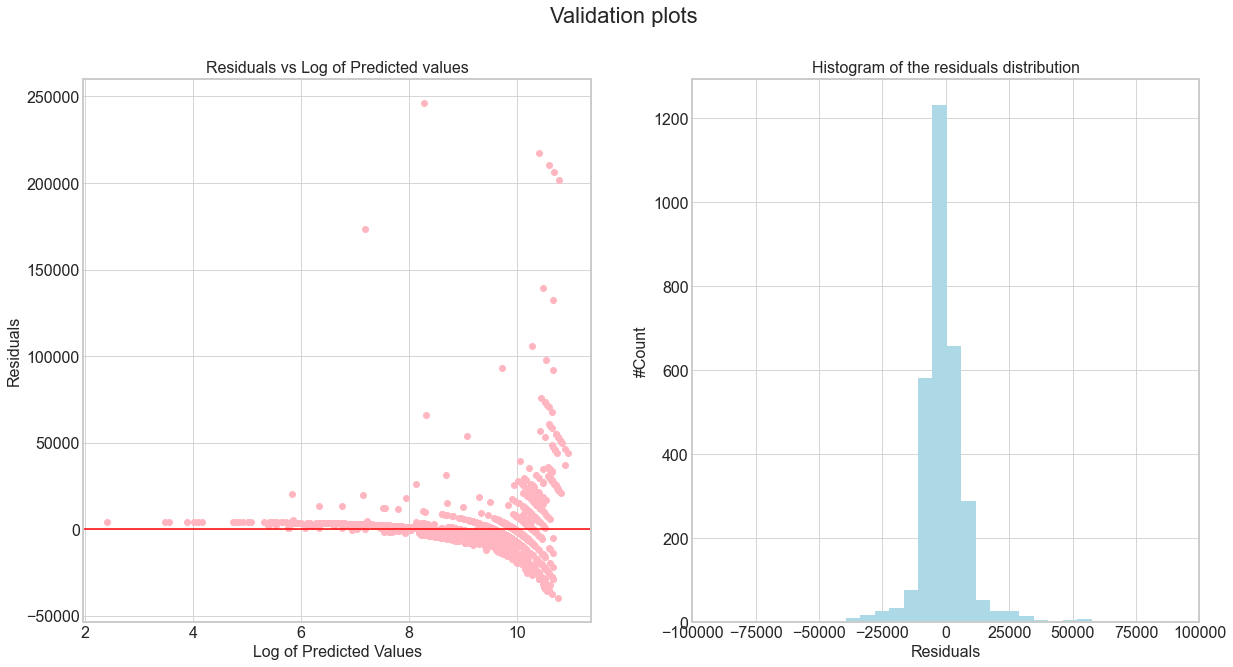

In [60]:
###### your code here
X = df2.drop('income', axis=1)
y = df2['income']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.75, random_state=109)
model = LinearRegression(fit_intercept=True)
model.fit(xtrain, ytrain)
training_MSE = mean_squared_error(model.predict(xtrain), ytrain)
testing_MSE = mean_squared_error(model.predict(xtest), ytest)
testing_r2 = r2_score(ytest, model.predict(xtest))
display(pd.DataFrame({'Training': [training_MSE, 'NA'], 'Testing': [testing_MSE, testing_r2]}, index=['MSE', 'r2']))
residuals = ytest - model.predict(xtest)
fig, axes = plt.subplots(1, 2, figsize = (20, 10))
plt.suptitle('Validation plots')
axes[0].scatter(np.log(model.predict(xtest)), residuals, color='lightpink', label='Residuals')
axes[0].axhline(y=0, color='red', label='Expected mean')
axes[0].set_title('Residuals vs Log of Predicted values')
axes[0].set_xlabel('Log of Predicted Values')
axes[0].set_ylabel('Residuals')
axes[1].hist(residuals, bins = 50, color='lightblue')
axes[1].set_xlim(-100000, 100000)
axes[1].set_title('Histogram of the residuals distribution')
axes[1].set_ylabel('#Count')
axes[1].set_xlabel('Residuals')
plt.show()

According to the residual plots and the histogam of the distributions, we can say that the linear model cannot be unvalidated at the moment. However, we get a poor R2 meaning that, at the moment, our model poorly explains the dataset variance. This is why performing additional operations could be necessary: feature transformation (with Polynomials, or create interaction terms) of select only the important features in order to prevent overfitting and enhancing the model's generalizability.  